# Component 2: Data Preprocessing and Exploration

##  Importing the Data:



In [219]:
# Import necessary libraries
# Import all the necessary libraries for predict the future rides using regression analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import os
import math
import scipy
from tqdm import tqdm
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]


import warnings
warnings.filterwarnings("ignore")

In [74]:
# Mount the Google Drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [76]:
# Load the dataset
file_path = "/content/drive/MyDrive/Menternship 2025/uber.csv"
data = pd.read_csv(file_path)

In [77]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [79]:
# Get the structure of the dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [80]:
#Column not required
data = data.drop(["Unnamed: 0"], axis=1)

In [81]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [82]:
# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_columns = data.select_dtypes(include=['object']).columns  # Select categorical columns
for column in categorical_columns:
    print(f"{column}: {data[column].nunique()} unique values")
    print(f"Sample values: {data[column].unique()[:5]}")  # Display first 5 unique values


Unique values in categorical columns:
key: 200000 unique values
Sample values: ['2015-05-07 19:52:06.0000003' '2009-07-17 20:04:56.0000002'
 '2009-08-24 21:45:00.00000061' '2009-06-26 08:22:21.0000001'
 '2014-08-28 17:47:00.000000188']
pickup_datetime: 196629 unique values
Sample values: ['2015-05-07 19:52:06 UTC' '2009-07-17 20:04:56 UTC'
 '2009-08-24 21:45:00 UTC' '2009-06-26 08:22:21 UTC'
 '2014-08-28 17:47:00 UTC']


In [83]:
data.shape

(200000, 8)

In [84]:
# Get basic descriptive statistics of the target variable (fare_amount)
print(data['fare_amount'].describe())

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64


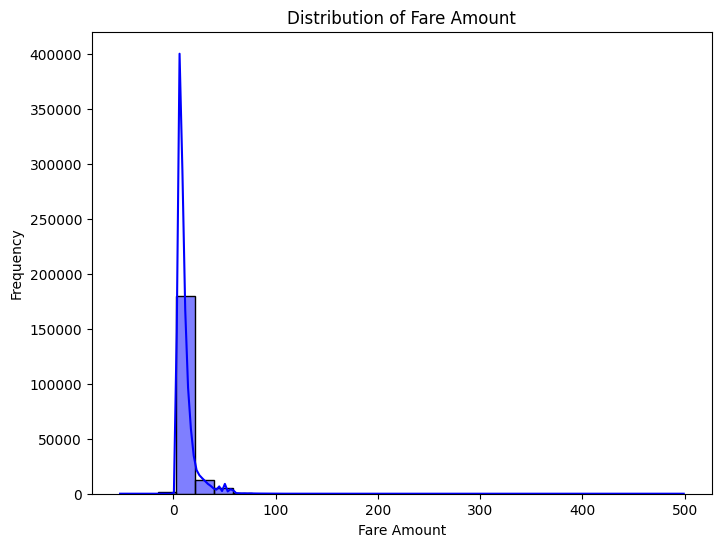

In [85]:
#Histogram: A histogram will help you see how the fares are distributed across different ranges.
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of the target variable (fare_amount)
plt.figure(figsize=(8, 6))
sns.histplot(data['fare_amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()


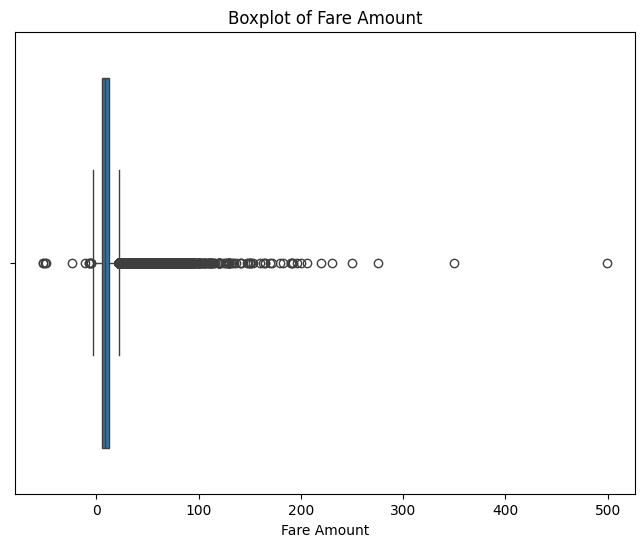

In [86]:
#Box Plot: A box plot can help you identify outliers in the fare_amount data.
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.xlabel('Fare Amount')
plt.show()



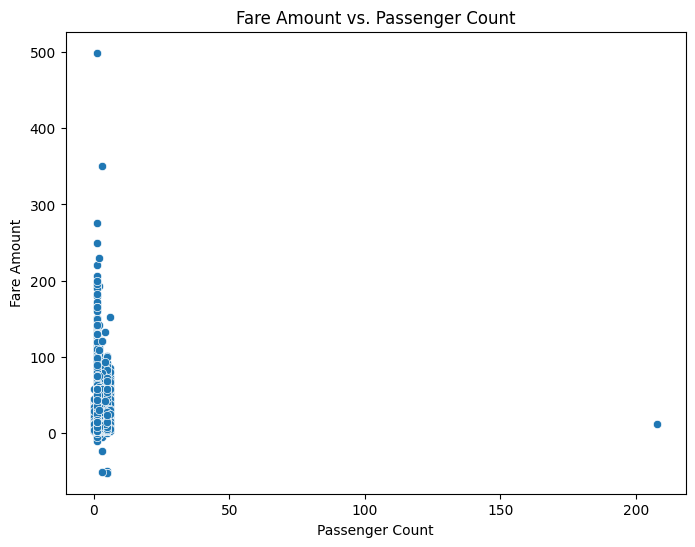

In [87]:
# Plot fare_amount against passenger count to see if there's a pattern
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['passenger_count'], y=data['fare_amount'])
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()


##  Handling Missing Data:


In [88]:
# Check for missing values in each column
print("\nMissing values in each column:")
missing_values = data.isnull().sum()
print(missing_values)


Missing values in each column:
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [91]:
# Fill missing values without inplace
data.dropna(inplace = True)
# Confirm no missing values remain
print("Missing values after filling:", data.isnull().sum())


Missing values after filling: key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [92]:
data.shape

(199999, 8)

In [93]:
# Find if any duplicated value is found in the dataset.
data.duplicated().sum()

0

##  Feature Engineering:


A. From pickup_datetime column:

Hour of the Day: Can reveal time-based patterns in fare.

Day of the Week: Weekends or weekdays may influence demand.

Month or Year: Useful to identify seasonal patterns or yearly trends.

Part of the Day: Morning, afternoon, evening, night.

In [94]:
# Latitude must be between -90 and 90 degrees, and longitude must be between -180 and 180 degrees for valid ranges.
data = data[(data["pickup_latitude"].between(-90,90)) &
           (data["dropoff_latitude"].between(-90,90)) &
           (data["pickup_longitude"].between(-180,180))&
           (data["dropoff_longitude"].between(-180,180))]

# Recheck
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [95]:
# Convert 'pickup_datetime' column to datetime objects
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Now you can extract parts of the pickup_datetime column
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
data['month'] = data['pickup_datetime'].dt.month
data['year'] = data['pickup_datetime'].dt.year

# Define time of day categories
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the categorization to each hour
data['time_of_day'] = data['hour'].apply(categorize_time_of_day)

In [96]:
# Retrieving the unique values from the 'month' column to identify the distinct months present in the dataset.
data["month"].unique()

# Creating a new column 'Monthly_Quarter' to categorize each month into its corresponding quarterly period (Q1, Q2, Q3, or Q4).
data["Monthly_Quarter"] = data["month"].apply(lambda x: "Q1" if x in [1,2,3] else(
                                              "Q2" if x in [4,5,6] else( "Q3" if x in [7,8,9] else(
                                              "Q4"))))

In [97]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year,time_of_day,Monthly_Quarter
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,2015,Evening,Q2
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,2009,Evening,Q3
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,2009,Night,Q3
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,2009,Morning,Q2
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8,2014,Evening,Q3


B. From pickup_latitude and pickup_longitude, and dropoff_latitude and dropoff_longitude:

Distance Between Pickup and Dropoff: Calculate the distance using the Haversine formula.

Categorize Distance: Based on the computed distance (short, medium, long).

In [98]:
# Calculating the distance between pickup and dropoff locations for each ride.
# Adding a new column 'distance' to store these calculated distances.
!pip install geopy

from geopy.distance import geodesic
distances = []

for i in data.index:
    pickup_coords = (data["pickup_latitude"][i], data["pickup_longitude"][i])
    dropoff_coords = (data["dropoff_latitude"][i], data["dropoff_longitude"][i])
    distance = round(geodesic(pickup_coords,dropoff_coords).m,2)
    distances.append(distance)

data["distance"] = distances

In [99]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year,time_of_day,Monthly_Quarter,distance
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,2015,Evening,Q2,1681.11
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,2009,Evening,Q3,2454.36
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,2009,Night,Q3,5039.60
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,2009,Morning,Q2,1661.44
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8,2014,Evening,Q3,4483.73


In [100]:
# There is no need of column pickup_datetime and key so lets drop these columns.
data.drop(["pickup_datetime"],axis = 1, inplace = True)
data.drop(["key"],axis = 1, inplace = True)

# Also drop the column month and hour.
data.drop(["month"],axis = 1, inplace = True)
data.drop(["hour"],axis = 1, inplace = True)

In [101]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,year,time_of_day,Monthly_Quarter,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,2015,Evening,Q2,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,2009,Evening,Q3,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,2009,Night,Q3,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,2009,Morning,Q2,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,2014,Evening,Q3,4483.73


In [102]:
# Verify New Features
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,year,distance
count,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,1.999870e+05
mean,11.359849,-72.501786,39.917937,-72.511608,39.922031,1.684544,3.048383,2011.742463,2.056346e+04
std,9.901868,10.449955,6.130412,10.412192,6.117669,1.385999,1.946960,1.856438,3.796638e+05
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000000,2009.000000,0.000000e+00
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000,1.000000,2010.000000,1.215530e+03
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,3.000000,2012.000000,2.121280e+03
75%,12.500000,-73.967154,40.767157,-73.963658,40.768000,2.000000,5.000000,2013.000000,3.874255e+03
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,6.000000,2015.000000,8.783594e+06


In [103]:
# Counting the number of unique values in each column of the dataset.
data.nunique().sort_values()

,0
time_of_day,4
Monthly_Quarter,4
day_of_week,7
year,7
passenger_count,8
fare_amount,1244
pickup_longitude,71055
dropoff_longitude,76890
pickup_latitude,83831
dropoff_latitude,90582


In [104]:
# Counting unique values and dropping the column fare_amount.
unique_counts = data.drop(["fare_amount"], axis = 1).nunique().sort_values()
# Features with 24 or fewer unique values are classified as categorical, and the rest are classified as numerical.
numerical_features = []
categorical_features = []

for feature, count in unique_counts.items():
    if count <= 24:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

print(len(numerical_features))
print(len(categorical_features))

5
5


In [105]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,year,distance
count,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,1.999870e+05
mean,11.359849,-72.501786,39.917937,-72.511608,39.922031,1.684544,3.048383,2011.742463,2.056346e+04
std,9.901868,10.449955,6.130412,10.412192,6.117669,1.385999,1.946960,1.856438,3.796638e+05
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000000,2009.000000,0.000000e+00
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000,1.000000,2010.000000,1.215530e+03
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,3.000000,2012.000000,2.121280e+03
75%,12.500000,-73.967154,40.767157,-73.963658,40.768000,2.000000,5.000000,2013.000000,3.874255e+03
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,6.000000,2015.000000,8.783594e+06


## Handling Outliers:


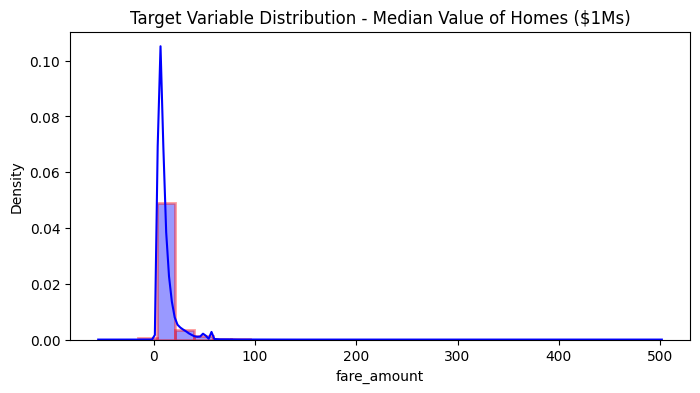

In [109]:
# Let's visualize the distribution of the 'fare_amount' feature to better understand the data.
# This will help us see how the values are spread out, check for skewness, and spot any outliers.
# These insights are important for preparing the data for AI models.

# We'll use Seaborn to create a smooth density curve along with a histogram for a clear visual.
# The histogram bars will have red edges for better visibility, and we'll use 30 bins to break down the data.

# Set the size of the plot to make it easy to read.
plt.figure(figsize=[8, 4])

sns.distplot(data["fare_amount"], color='b',hist_kws=dict(edgecolor="red", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

In [110]:
categorical_features

['time_of_day', 'Monthly_Quarter', 'day_of_week', 'year', 'passenger_count']

In [113]:
categorical_column = data[['Monthly_Quarter', 'time_of_day', 'year', 'day_of_week', 'passenger_count']]

categorical_column.head()

,Monthly_Quarter,time_of_day,year,day_of_week,passenger_count
0,Q2,Evening,2015,3,1
1,Q3,Evening,2009,4,1
2,Q3,Night,2009,0,1
3,Q2,Morning,2009,4,3
4,Q3,Evening,2014,3,5


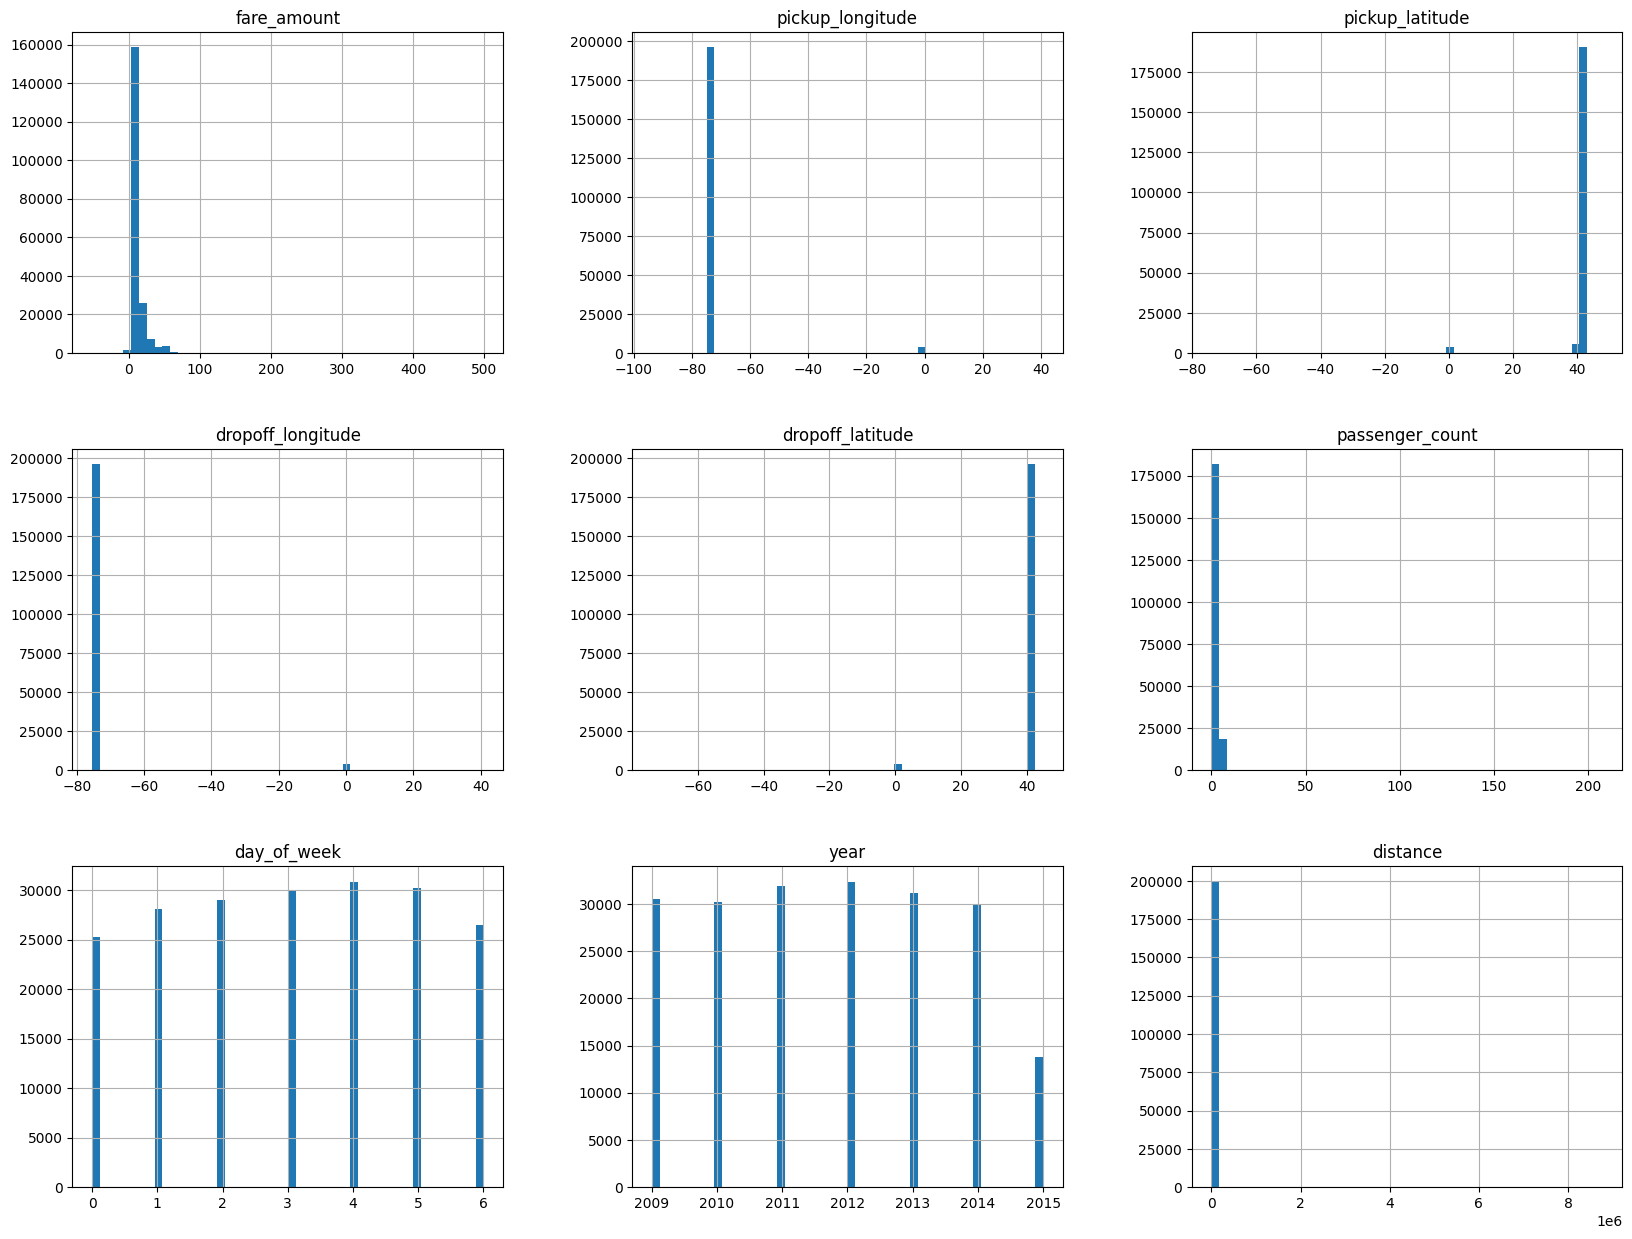

In [114]:
# Generating histograms for all numerical features in the dataset.
data.hist(bins=50, figsize=(20, 15))
plt.show()

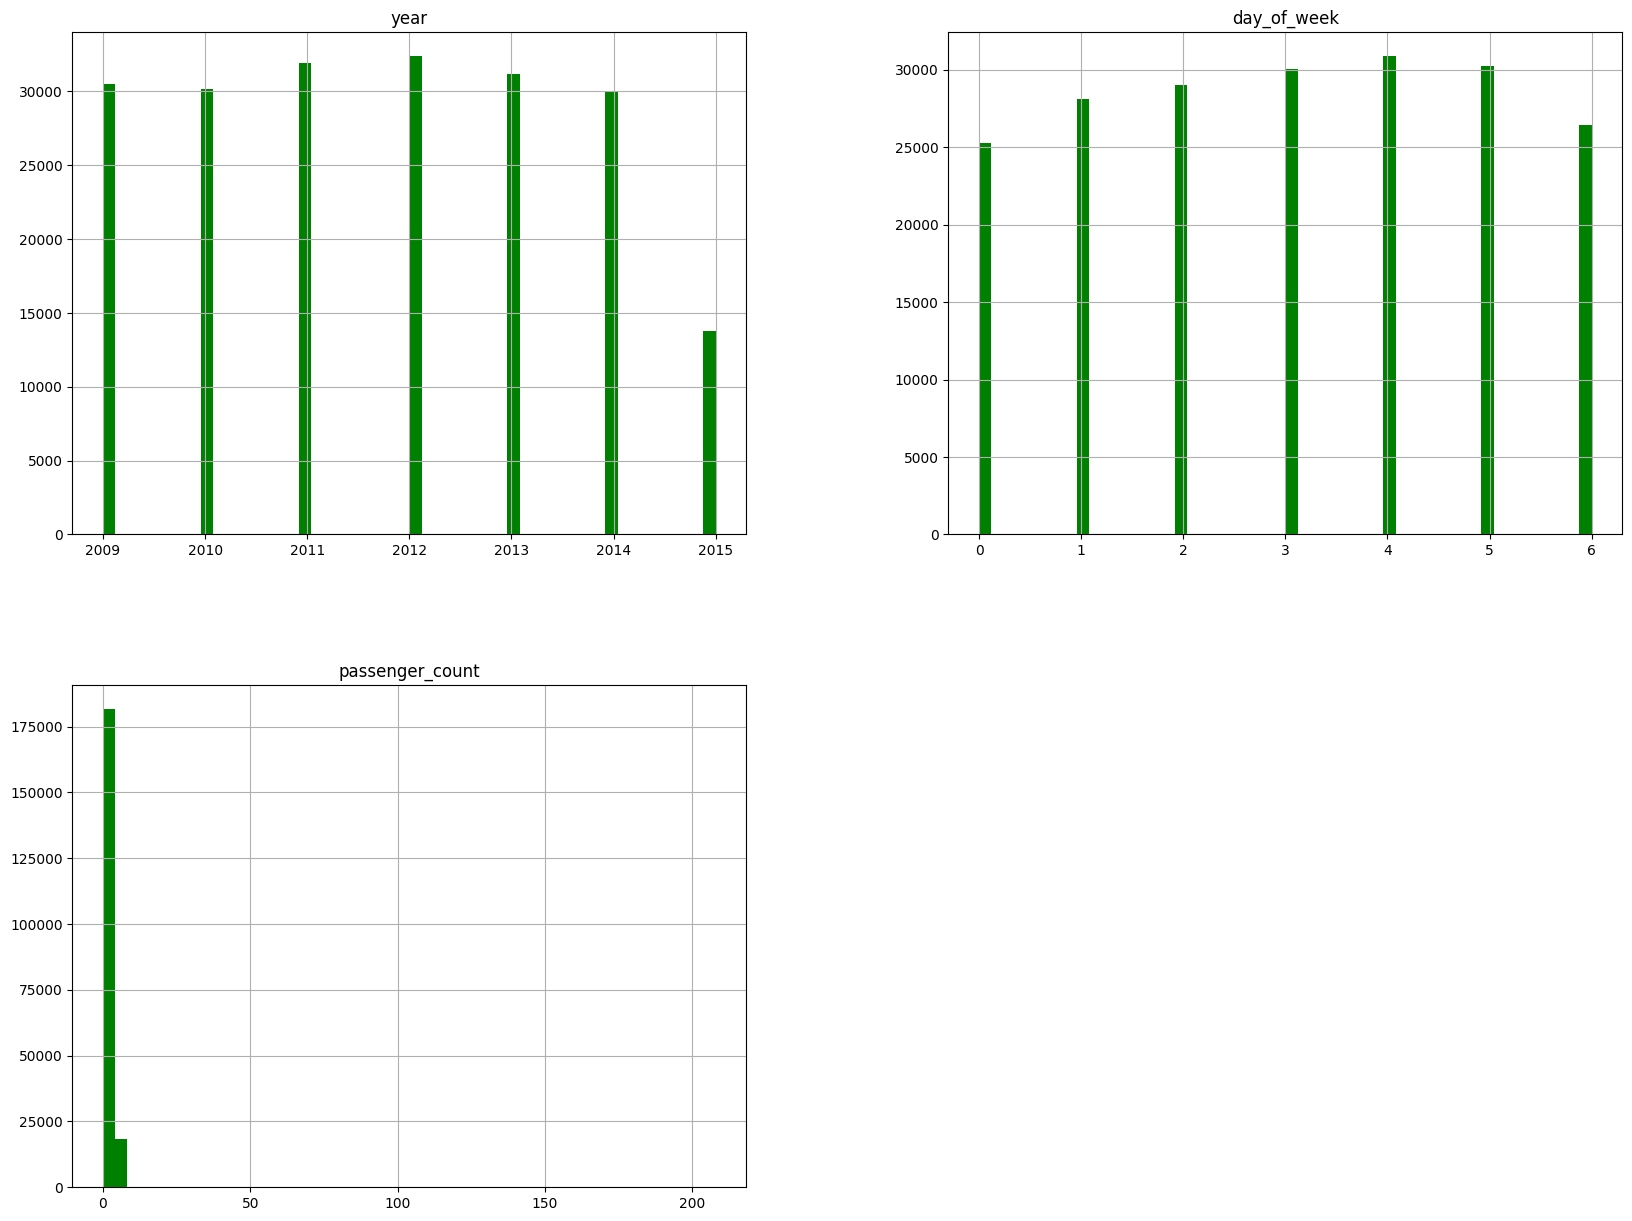

In [115]:
# Plotting the histogram for a categorical column.
categorical_column.hist(bins = 50, figsize = (20, 15), color = 'g')
plt.show()

In [116]:
data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'day_of_week', 'year', 'time_of_day', 'Monthly_Quarter', 'distance'],
      dtype='object')

Text(0.5, 1.0, 'Count of Each Category in Monthly_Quarter')

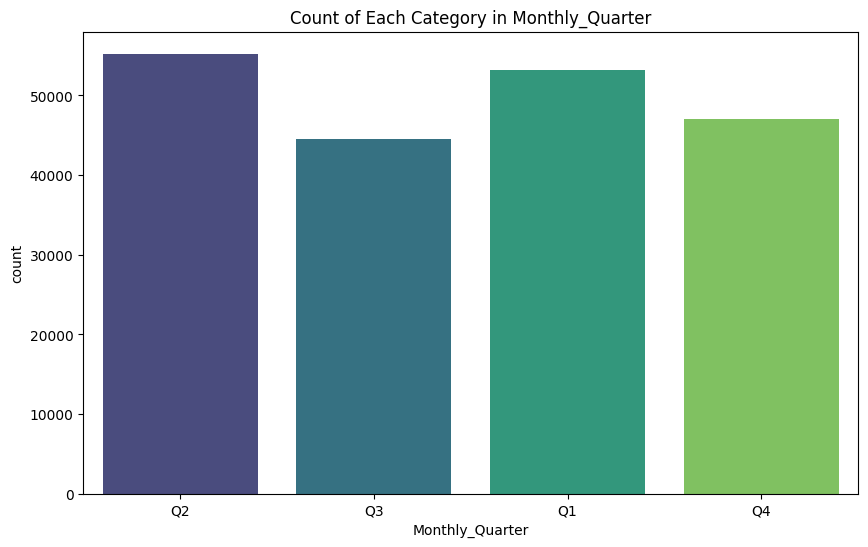

In [117]:
# Plotting the count of each category in the 'Monthly_Quarter' column using countplot.
sns.countplot(x = data['Monthly_Quarter'], palette = "viridis")
plt.title('Count of Each Category in Monthly_Quarter')

Text(0.5, 1.0, 'Count of Each Category in weekday')

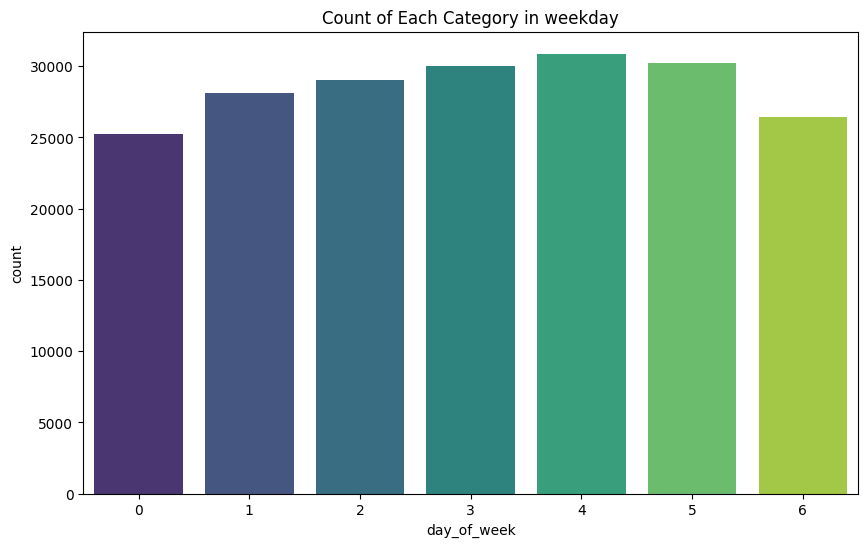

In [119]:
# Plotting the count of each category in the 'day_of_week' column using countplot.
sns.countplot(x = data['day_of_week'], palette = "viridis")
plt.title('Count of Each Category in weekday')

Text(0.5, 1.0, 'Count of Each Category in Hourly_Segments')

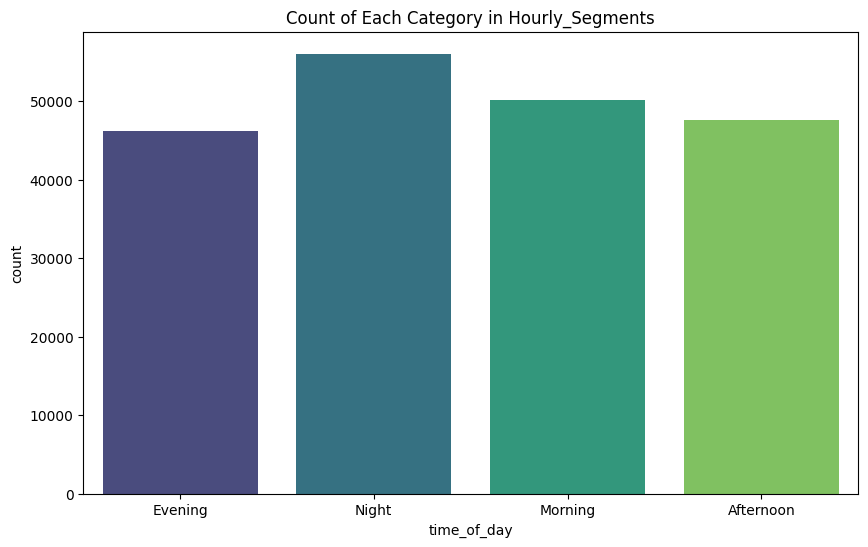

In [120]:
# Plotting the count of each category in the 'time_of_day' column using countplot.
sns.countplot( x = data["time_of_day"], palette = "viridis")
plt.title('Count of Each Category in Hourly_Segments')

Text(0.5, 1.0, 'Count of Each Category in passenger_count')

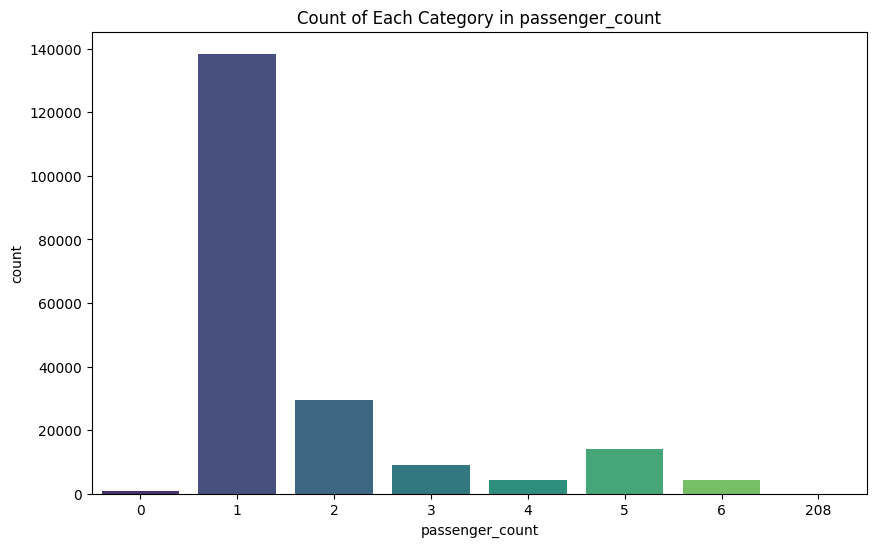

In [121]:
# Plotting the count of each category in the 'passenger_count' column using countplot.
sns.countplot( x = data["passenger_count"], palette = "viridis")
plt.title('Count of Each Category in passenger_count')

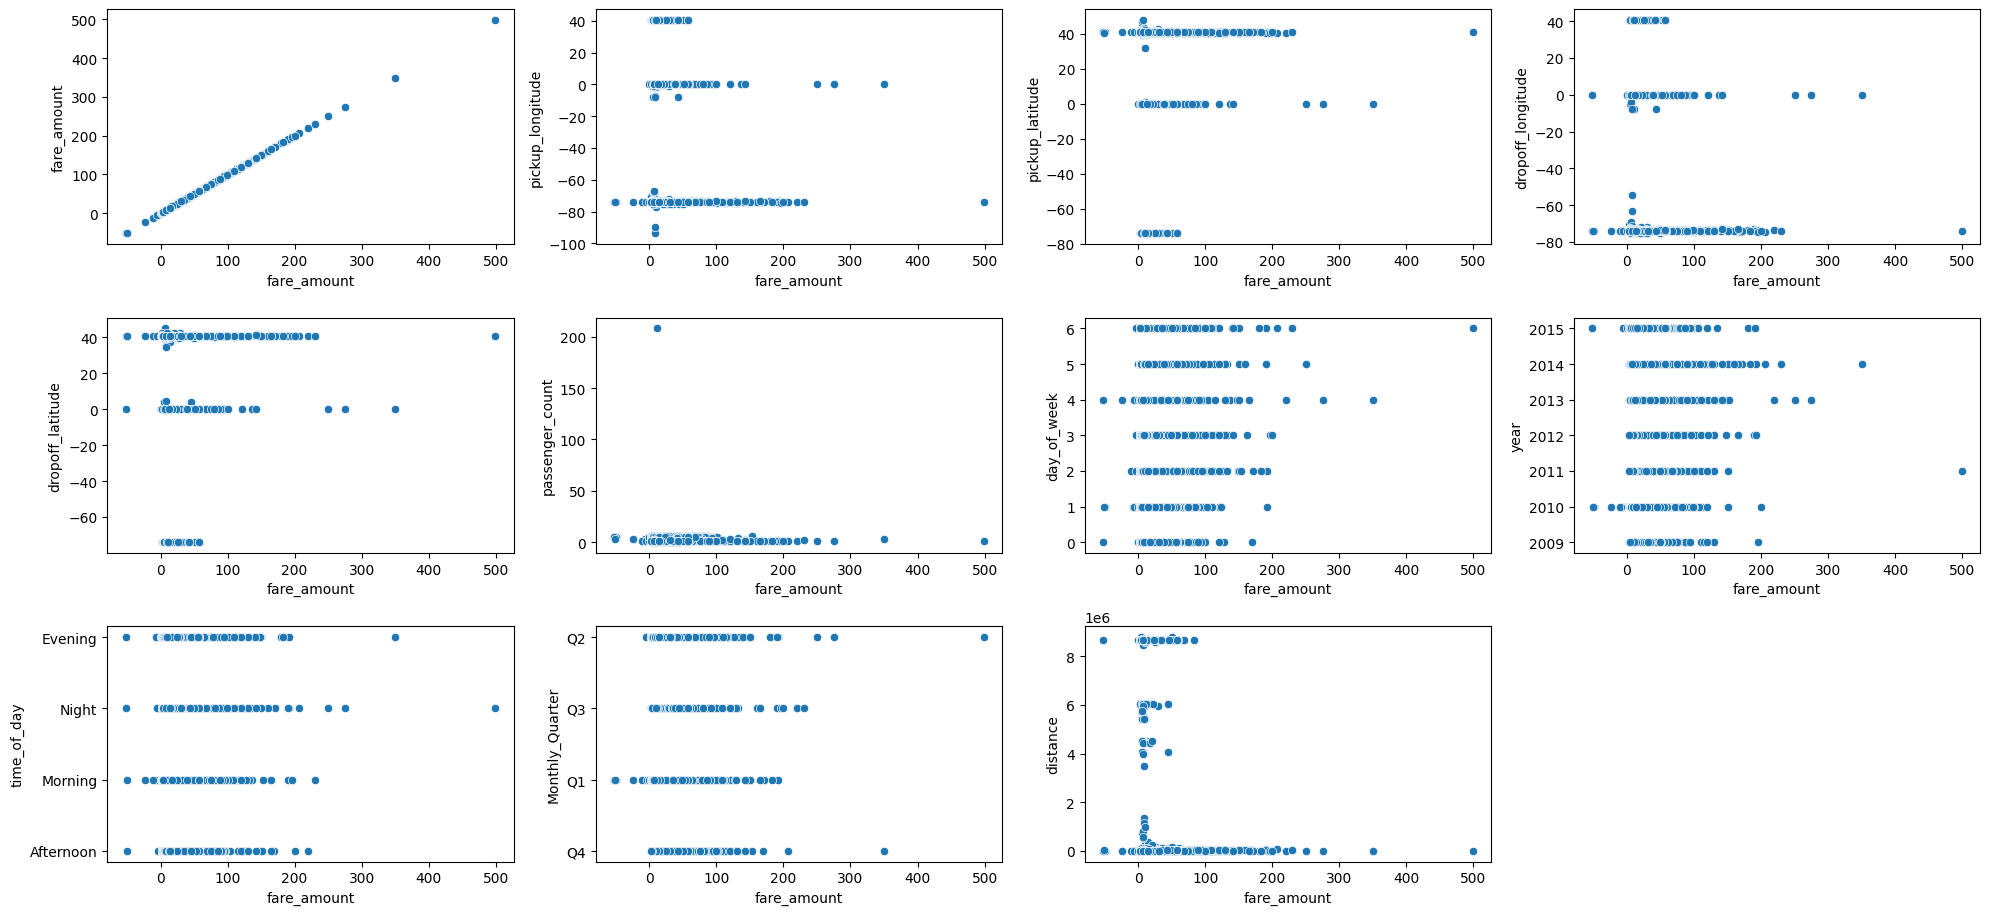

In [122]:
# Creating scatter plots of 'fare_amount' against each column in the dataset for visual analysis.
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in data:
  if plotnumber <= 24:
    ax = plt.subplot(5, 4, plotnumber)
    sns.scatterplot(x = data["fare_amount"], y = data[column])
  plotnumber += 1
plt.tight_layout()
plt.show()

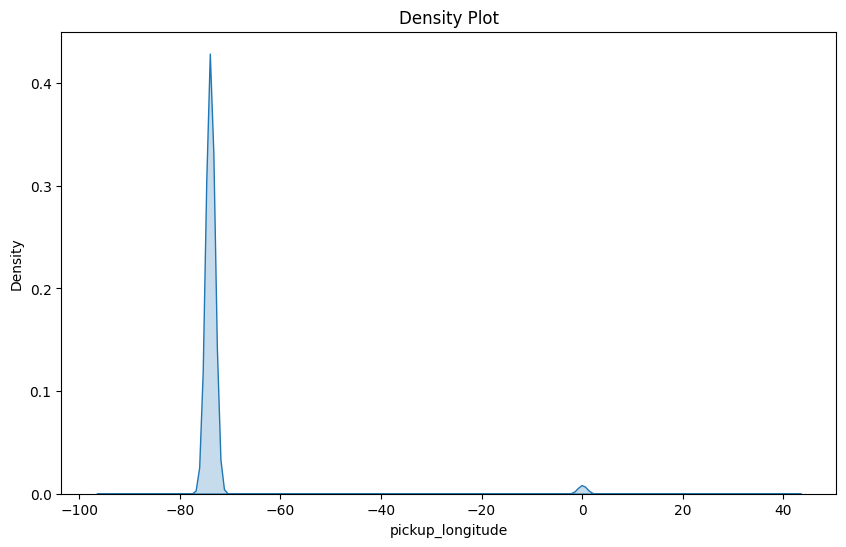

In [123]:
# Plotting the density distribution of 'pickup_longitude' with a shaded area for better visualization.
sns.kdeplot(data["pickup_longitude"], shade=True)
plt.title("Density Plot")
plt.xlabel("pickup_longitude")
plt.ylabel("Density")
plt.show()

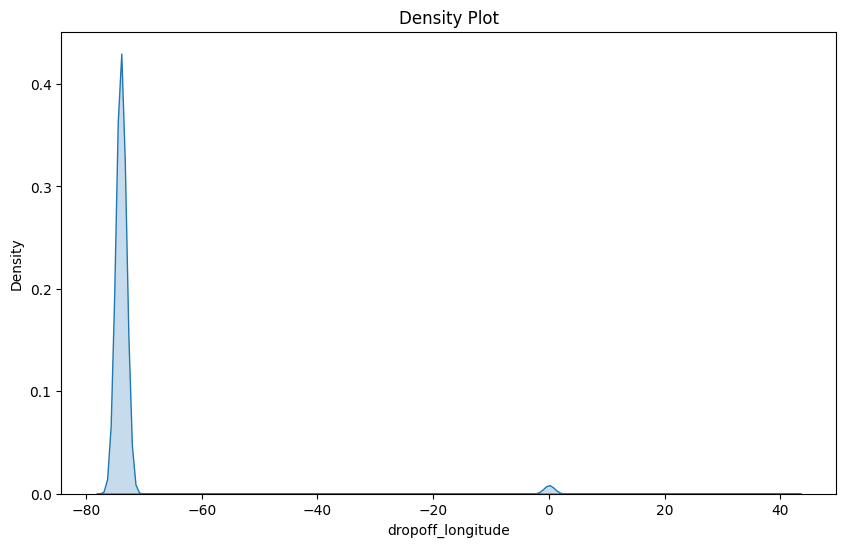

In [124]:
# Plotting the density distribution of 'dropoff_longitude' with a shaded area for better visualization.
sns.kdeplot(data["dropoff_longitude"], shade=True)
plt.title("Density Plot")
plt.xlabel("dropoff_longitude")
plt.ylabel("Density")
plt.show()

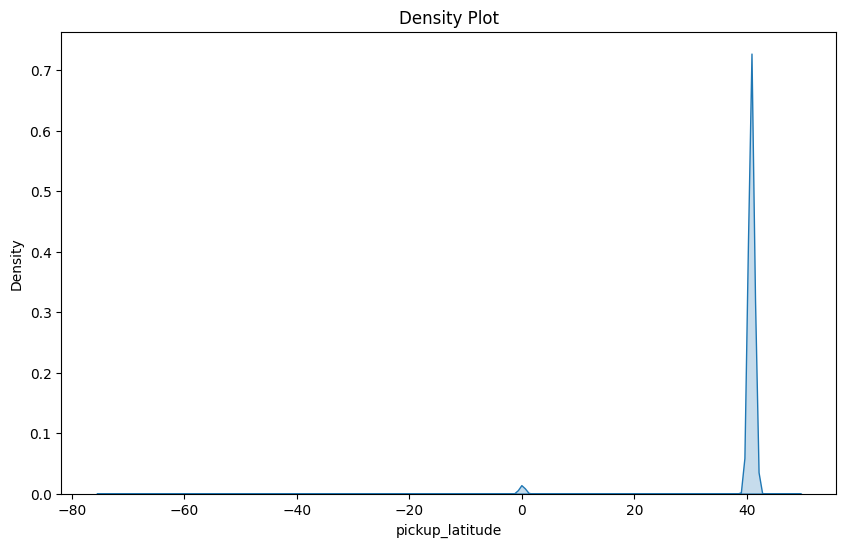

In [125]:
# Plotting the density distribution of 'pickup_latitude' with a shaded area for better visualization.
sns.kdeplot(data["pickup_latitude"], shade=True)
plt.title("Density Plot")
plt.xlabel("pickup_latitude")
plt.ylabel("Density")
plt.show()

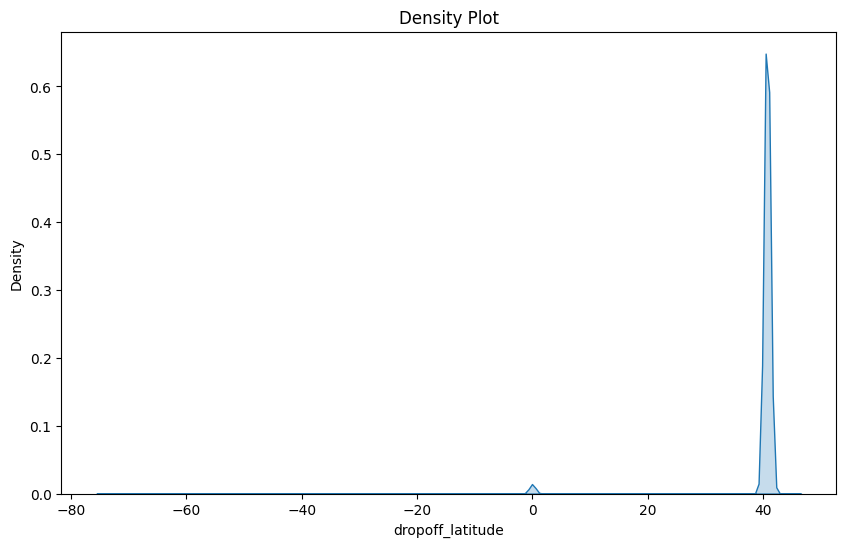

In [126]:
# Plotting the density distribution of 'dropoff_latitude' with a shaded area for better visualization.
sns.kdeplot(data["dropoff_latitude"], shade=True)
plt.title("Density Plot")
plt.xlabel("dropoff_latitude")
plt.ylabel("Density")
plt.show()

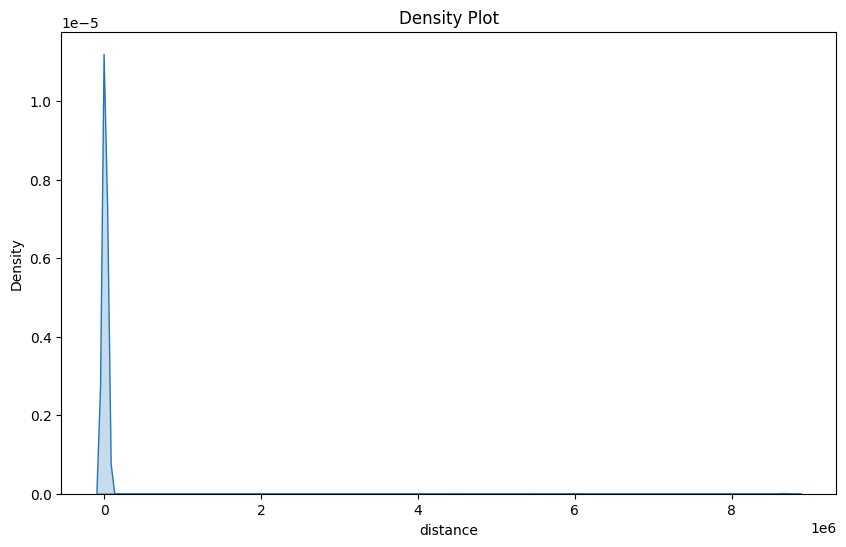

In [127]:
# Plotting the density distribution of 'distance' with a shaded area for better visualization.
sns.kdeplot(data["distance"], shade=True)
plt.title("Density Plot")
plt.xlabel("distance")
plt.ylabel("Density")
plt.show()

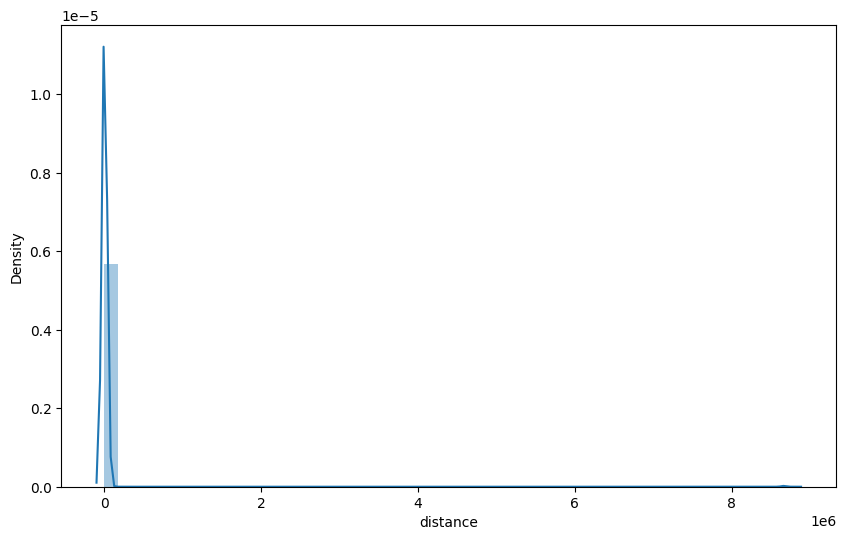

In [128]:
# Plot the distribution among density and distance.
sns.distplot(data["distance"])
plt.show()

In [129]:
# Let's remove the Outliers from the data frame.
df = data.copy(deep = True)

In [130]:
df.shape

(199987, 11)

In [131]:
data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'day_of_week', 'year', 'time_of_day', 'Monthly_Quarter', 'distance'],
      dtype='object')

In [132]:
# Selecting relevant columns to create a new DataFrame with fare amount, pickup/dropoff coordinates, and distance.
df1 = data[['fare_amount', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'distance']]

In [133]:
df1.head()

,fare_amount,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance
0,7.5,40.738354,-73.999817,40.723217,-73.999512,1681.11
1,7.7,40.728225,-73.994355,40.750325,-73.994710,2454.36
2,12.9,40.740770,-74.005043,40.772647,-73.962565,5039.60
3,5.3,40.790844,-73.976124,40.803349,-73.965316,1661.44
4,16.0,40.744085,-73.925023,40.761247,-73.973082,4483.73


In [134]:
df1.shape

(199987, 6)

In [135]:
categorical_features

['time_of_day', 'Monthly_Quarter', 'day_of_week', 'year', 'passenger_count']

In [136]:
data1 = pd.get_dummies(data, columns = ['Monthly_Quarter', 'time_of_day', 'day_of_week', 'year', 'passenger_count'],dtype = int, drop_first=True)

In [137]:
data.shape

(199987, 11)

Text(0.5, 1.0, 'Distance Distribution')

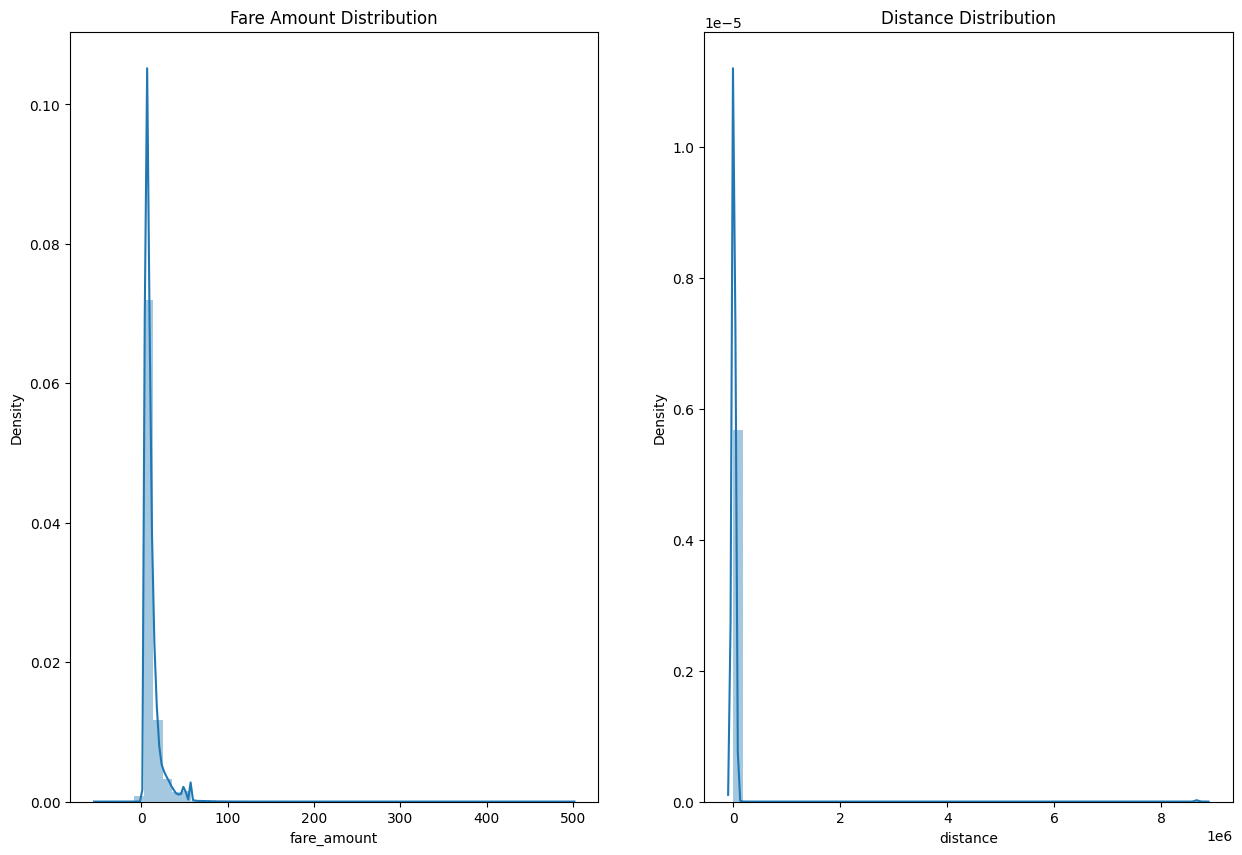

In [138]:
# Plotting the distribution of "fare_amount" and "distance".
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
sns.distplot(data1["fare_amount"])
plt.title("Fare Amount Distribution")

plt.subplot(1, 2, 2)
sns.distplot(data1["distance"])
plt.title("Distance Distribution")

In [139]:
# List of columns to calculate skewness for
columns_to_check = ['fare_amount', 'pickup_latitude', 'pickup_longitude',
                    'dropoff_latitude', 'dropoff_longitude', 'distance']

# Calculate and print skewness for each column separately
for column in columns_to_check:
    skewness_value = df1[column].skew()
    print(f"Skewness of {column}: {skewness_value}")


Skewness of fare_amount: 4.504983243536247
Skewness of pickup_latitude: -8.514480158378717
Skewness of pickup_longitude: 7.032211165137095
Skewness of dropoff_latitude: -8.542949840633595
Skewness of dropoff_longitude: 7.061813127984865
Skewness of distance: 22.23443004340103


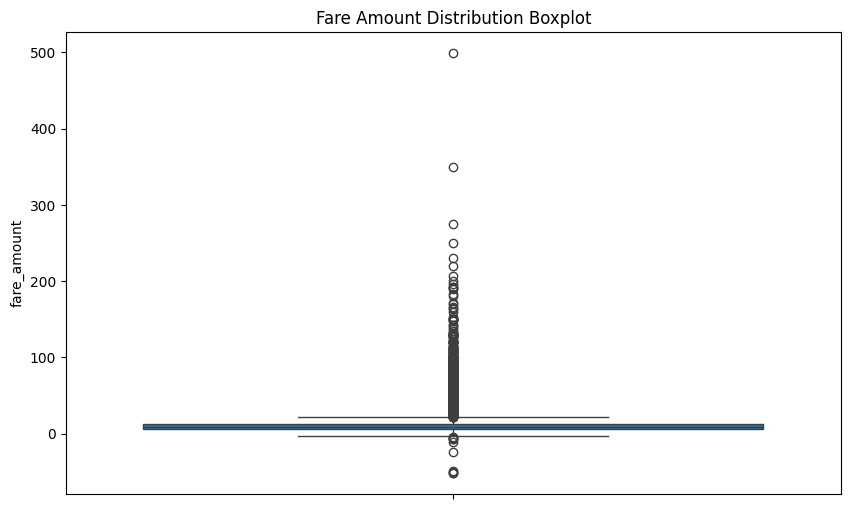

In [140]:
# Creating a boxplot of "fare_amount".
sns.boxplot(data1["fare_amount"])
plt.title("Fare Amount Distribution Boxplot")
plt.show()

In [141]:
data1["fare_amount"].describe()

,fare_amount
count,199987.000000
mean,11.359849
std,9.901868
min,-52.000000
25%,6.000000
50%,8.500000
75%,12.500000
max,499.000000


In [142]:
# Finding the skewness of column "fare_amount".
data1["fare_amount"].skew()

4.504983243536247

Text(0.5, 1.0, 'Fare Amount Distribution')

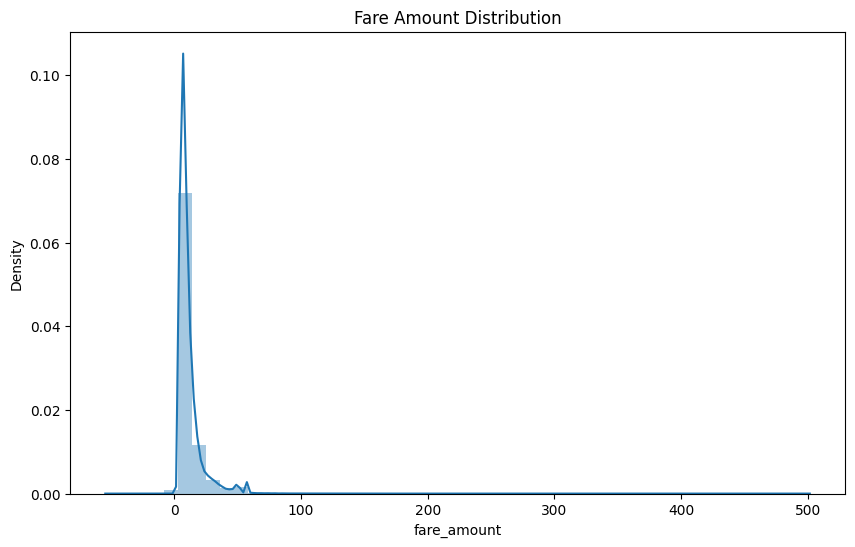

In [143]:
# Plotting the distribution of the "fare_amount" column.
sns.distplot(data1["fare_amount"])
plt.title("Fare Amount Distribution")

In [145]:
# Find the outlier of the distance column in this data frame.
percentile25 = data1["distance"].quantile(0.25)
percentile75 = data1["distance"].quantile(0.75)

In [146]:
print(percentile25)
print(percentile75)

1215.53
3874.255


In [152]:
# Calculate IQR
IQR = percentile75 - percentile25

# Define lower and upper bounds for outliers
lower_bound = percentile25 - 1.5 * IQR
upper_bound = percentile75 + 1.5 * IQR

# Find outliers
outliers = data1[(data1["distance"] < lower_bound) | (data1["distance"] > upper_bound) ]

# Display outliers
outliers


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,time_of_day_Evening,...,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
6,24.50,-73.961447,40.693965,-73.871195,40.774297,11734.67,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
30,25.70,-73.944815,40.834367,-73.989332,40.721920,13040.42,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34,39.50,-73.788080,40.642187,-73.865042,40.725997,11355.49,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
39,29.00,-73.992600,40.753172,-73.908508,40.816192,9967.93,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
82,26.10,-73.976132,40.744211,-73.904950,40.876687,15890.26,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199972,45.00,-73.786833,40.639842,-74.001215,40.722429,20312.01,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
199976,49.70,-73.978225,40.783318,-73.700963,40.705852,24947.40,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
199977,43.50,-73.996671,40.737483,-73.867758,40.897563,20840.02,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
199982,57.33,-73.969204,40.754771,-73.790351,40.643802,19502.50,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [154]:
data1 = data1.drop(data1[data1["distance"] > upper_bound].index)
data1.shape

(183230, 31)

In [155]:
data1["distance"].skew()

1.0542391075773332

Text(0.5, 1.0, 'Distance Distribution')

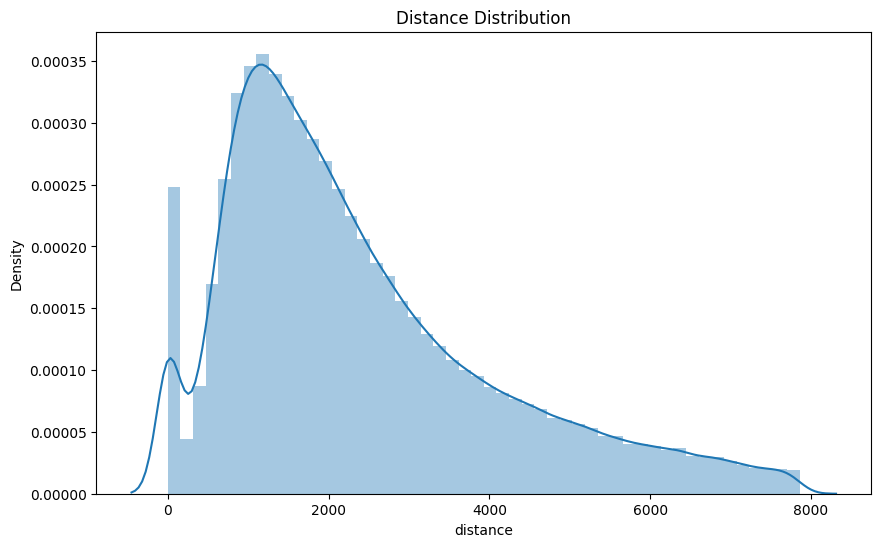

In [156]:
# Plotting the distribution of the "distance" column.
sns.distplot(data1["distance"])
plt.title("Distance Distribution")

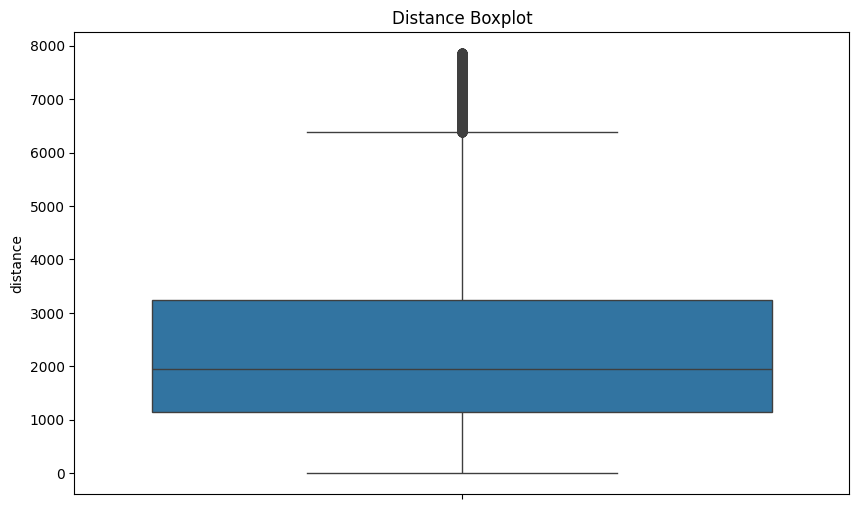

In [157]:
sns.boxplot(data1["distance"])
plt.title("Distance Boxplot")
plt.show()

In [158]:
data1.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance',
       'Monthly_Quarter_Q2', 'Monthly_Quarter_Q3', 'Monthly_Quarter_Q4',
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_208'],
      dtype='object')

In [159]:
data1["pickup_longitude"].skew()

6.929694724325733

In [160]:
#Find the outlier of the pickup_longitude column in this data frame
percentile25 = data1["pickup_longitude"].quantile(0.25)
percentile75 = data1["pickup_longitude"].quantile(0.75)
print(percentile25)
print(percentile75)

-73.992305
-73.96884625


In [161]:
# Calculating the Interquartile Range (IQR).
IQR = percentile75 - percentile25
print(IQR)

0.023458750000003192


In [162]:
# Calculating the upper and lower limits for outlier detection using the IQR method.
upperlimit = percentile75 + 1.5 * IQR
lowerlimit = percentile25 - 1.5 * IQR
print("Upper Limit", upperlimit)
print("Lower Limit", lowerlimit)

Upper Limit -73.933658125
Lower Limit -74.027493125


In [163]:
data1[data1["pickup_longitude"] > upperlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,time_of_day_Evening,...,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
4,16.0,-73.925023,40.744085,-73.973082,40.761247,4483.73,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
7,2.5,0.000000,0.000000,0.000000,0.000000,0.00,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
11,8.5,0.000000,0.000000,0.000000,0.000000,0.00,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
65,6.0,0.000000,0.000000,0.000000,0.000000,0.00,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
92,6.1,0.000000,0.000000,0.000000,0.000000,0.00,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199880,6.5,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
199883,12.5,0.000000,0.000000,0.000000,0.000000,0.00,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
199901,8.9,-73.930492,40.761509,-73.963917,40.759702,2829.49,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
199917,4.5,-73.793768,40.656939,-73.793768,40.656939,0.00,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [164]:
data1[data1["pickup_longitude"] < lowerlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,time_of_day_Evening,...,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
457,11.7,-74.030417,40.807683,-74.027813,40.806813,240.03,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
696,5.3,-74.689831,40.190564,-74.689831,40.190564,0.00,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1948,5.3,-74.072325,40.709167,-74.073618,40.709117,109.40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3235,13.3,-74.043873,40.633073,-74.029468,40.640817,1491.47,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4679,12.9,-75.342904,40.646965,-75.350437,40.686877,4477.72,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194842,16.1,-74.030314,40.755675,-74.030314,40.755675,0.00,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
196454,47.0,-74.048667,40.721347,-74.048670,40.721345,0.34,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
197583,9.7,-74.046973,40.748875,-74.044745,40.747063,275.49,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
197916,7.7,-74.057028,40.825680,-74.049835,40.820933,803.80,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [165]:
#remove outliers that fall outside a reasonable range of values.
data1 = data1.drop(data1[data1["pickup_longitude"] > upperlimit].index)
data1 = data1.drop(data1[data1["pickup_longitude"] < lowerlimit].index)

In [166]:
data1.shape

(175780, 31)

In [167]:
data1["pickup_longitude"].skew()

0.2770382794478942

Text(0.5, 1.0, 'Pickup Longitude Distribution')

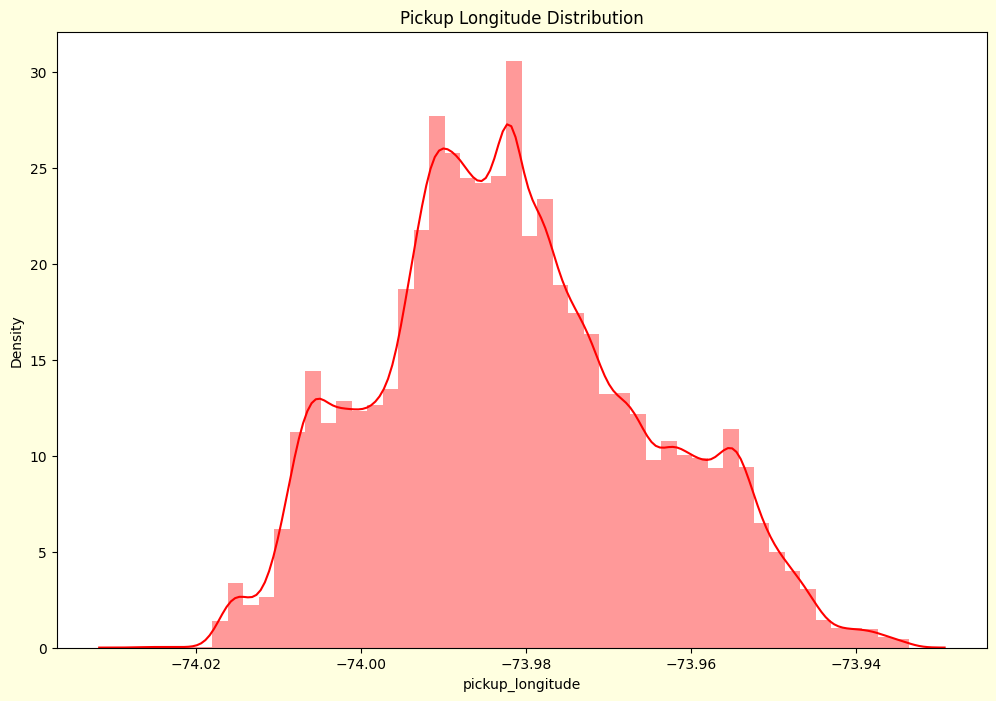

In [172]:
plt.figure(figsize = (12, 8), facecolor = "lightyellow")
sns.distplot(data1["pickup_longitude"], color = 'r')
plt.title("Pickup Longitude Distribution")

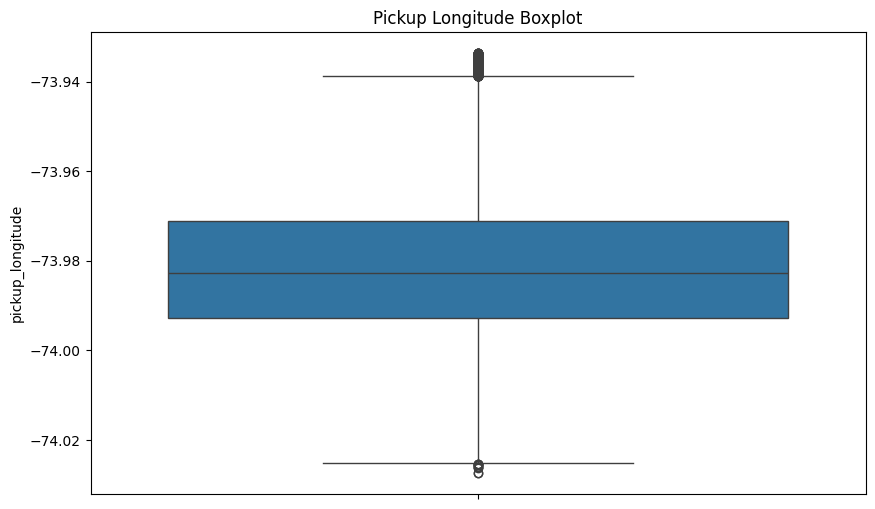

In [171]:
sns.boxplot(data1["pickup_longitude"])
plt.title("Pickup Longitude Boxplot")
plt.show()

In [173]:
#Find the outlier of the pickup_latitude column in this data frame
percentile25 = data1["pickup_latitude"].quantile(0.25)
percentile75 = data1["pickup_latitude"].quantile(0.75)
print(percentile25)
print(percentile75)

40.73726
40.766676


In [174]:
IQR = percentile75 - percentile25
print(IQR)

0.029415999999997666


In [175]:
upperlimit = percentile75 + 1.5 * IQR
lowerlimit = percentile25 - 1.5 * IQR
print("Upper Limit",upperlimit)
print("Lower Limmti",lowerlimit)

Upper Limit 40.81079999999999
Lower Limmti 40.693136


In [176]:
data1[data1["pickup_latitude"] > upperlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,time_of_day_Evening,...,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
53,7.5,-73.937809,40.850558,-73.944454,40.834959,1820.67,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
55,11.0,-73.958903,40.815239,-73.980862,40.782610,4069.83,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0
563,7.3,-73.968347,40.832228,-73.954847,40.833925,1154.17,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
599,7.7,-73.956430,40.813242,-73.934882,40.802430,2178.87,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1216,6.5,-73.945396,40.833561,-73.939423,40.847710,1650.03,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198696,5.5,-73.955085,40.820287,-73.963547,40.808637,1477.66,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
198766,4.5,-73.958748,40.814850,-73.952420,40.816983,584.07,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
199032,19.7,-73.959100,40.814978,-73.908614,40.773083,6308.72,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
199335,30.1,-73.949260,40.812855,-73.949580,40.803735,1013.14,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [177]:
data1[data1["pickup_latitude"] < lowerlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,time_of_day_Evening,...,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
102,14.9,-73.962218,40.640218,-73.968043,40.640505,493.77,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
110,18.0,-73.954742,40.687469,-73.988213,40.730511,5553.81,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
282,9.5,-73.988907,40.692223,-74.004700,40.716133,2971.78,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
308,4.5,-73.984958,40.670825,-73.984610,40.664137,743.27,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
370,7.7,-73.991653,40.684999,-73.968497,40.674008,2306.95,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199485,7.0,-73.981552,40.679970,-74.001442,40.683128,1717.66,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
199521,5.7,-73.960291,40.690591,-73.977109,40.693543,1458.86,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
199551,18.9,-73.988952,40.688598,-73.991053,40.749522,6767.85,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
199784,19.5,-73.979673,40.675340,-73.911750,40.683028,5805.45,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [178]:
data1 = data1.drop(data1[data1["pickup_latitude"] > upperlimit].index)
data1 = data1.drop(data1[data1["pickup_latitude"] < lowerlimit].index)

In [179]:
data1.shape

(173272, 31)

<Axes: xlabel='pickup_latitude', ylabel='Density'>

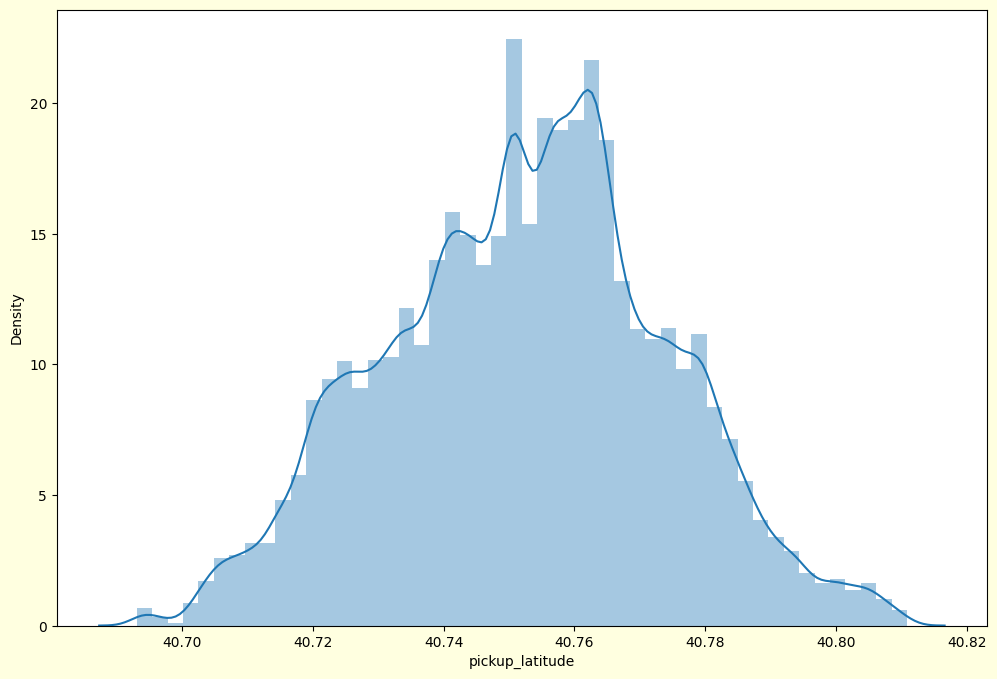

In [181]:
plt.figure(figsize=(12, 8), facecolor = "lightyellow")
sns.distplot(data1["pickup_latitude"])

In [184]:
data1["pickup_latitude"].skew()

-0.03634565367972344

<Axes: ylabel='pickup_latitude'>

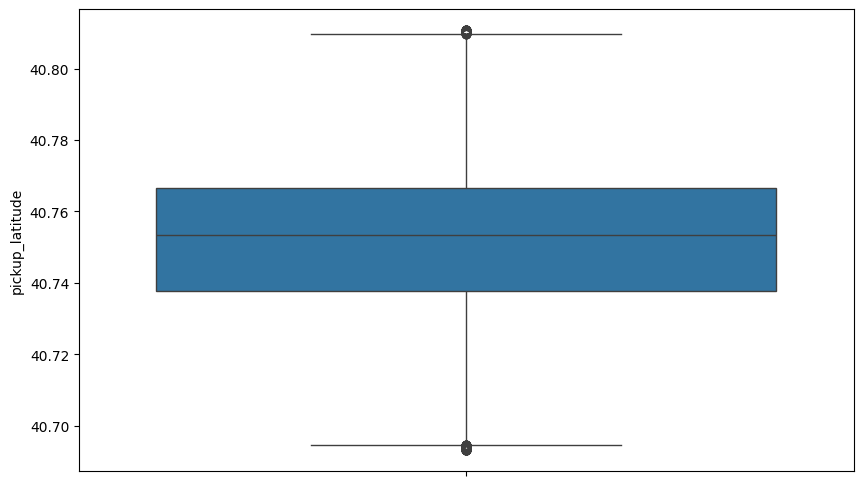

In [185]:
sns.boxplot(data1["pickup_latitude"])

In [186]:
#Find the outlier of the dropoff_longitude column in this data frame
percentile25 = data1["dropoff_longitude"].quantile(0.25)
percentile75 = data1["dropoff_longitude"].quantile(0.75)
print(percentile25)
print(percentile75)

-73.99206
-73.969392


In [187]:
IQR = percentile75 - percentile25
print(IQR)

0.022667999999995914


In [188]:
upperlimit = percentile75 + 1.5 * IQR
lowerlimt = percentile25 - 1.5 * IQR
print("Upper Limit", upperlimit)
print("Lower Limit", lowerlimt)

Upper Limit -73.93539000000001
Lower Limit -74.026062


In [189]:
data1[data1["dropoff_longitude"] > upperlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,time_of_day_Evening,...,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
99,26.90,-73.990137,40.756007,-73.929361,40.774553,5529.37,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
150,16.50,-73.987152,40.750756,-73.902380,40.741637,7230.86,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
214,17.50,-73.974110,40.750564,-73.882380,40.755801,7768.24,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
217,5.30,-73.934317,40.797407,-73.917871,40.807013,1750.42,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
284,16.90,-74.000457,40.742486,-73.923371,40.761095,6830.04,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199353,16.50,-73.988427,40.763400,-73.931964,40.771476,4850.81,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
199517,17.70,-73.996960,40.742332,-73.917913,40.729075,6837.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
199746,19.30,-73.971775,40.752417,-73.892398,40.740870,6825.44,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
199910,26.33,-73.942802,40.794216,-73.865128,40.770496,7065.97,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [190]:
data1[data1["dropoff_longitude"] < lowerlimt]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,time_of_day_Evening,...,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
1585,5.3,-74.025577,40.809705,-74.033463,40.806417,759.01,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3141,61.0,-73.986010,40.767455,-74.028757,40.737142,4935.92,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3781,71.0,-74.009067,40.713615,-74.034217,40.712527,2128.58,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6316,10.1,-73.989397,40.748763,-74.029615,40.748250,3397.06,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
10344,48.0,-73.984281,40.737303,-74.035905,40.722867,4646.38,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185888,21.7,-73.979428,40.727389,-74.045912,40.722736,5640.54,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
194219,42.0,-73.984352,40.764688,-74.029082,40.743701,4438.44,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
195340,65.0,-74.007992,40.714852,-74.042712,40.715697,2935.21,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
196670,52.5,-73.997262,40.752123,-74.031957,40.717050,4874.31,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [191]:
data1 = data1.drop(data1[data1["dropoff_longitude"] > upperlimit].index)
data1 = data1.drop(data1[data1["dropoff_longitude"] < lowerlimt].index)

In [192]:
data1.shape

(170492, 31)

In [193]:
data1["dropoff_longitude"].skew()

0.24400629724223022

<Axes: xlabel='dropoff_longitude', ylabel='Density'>

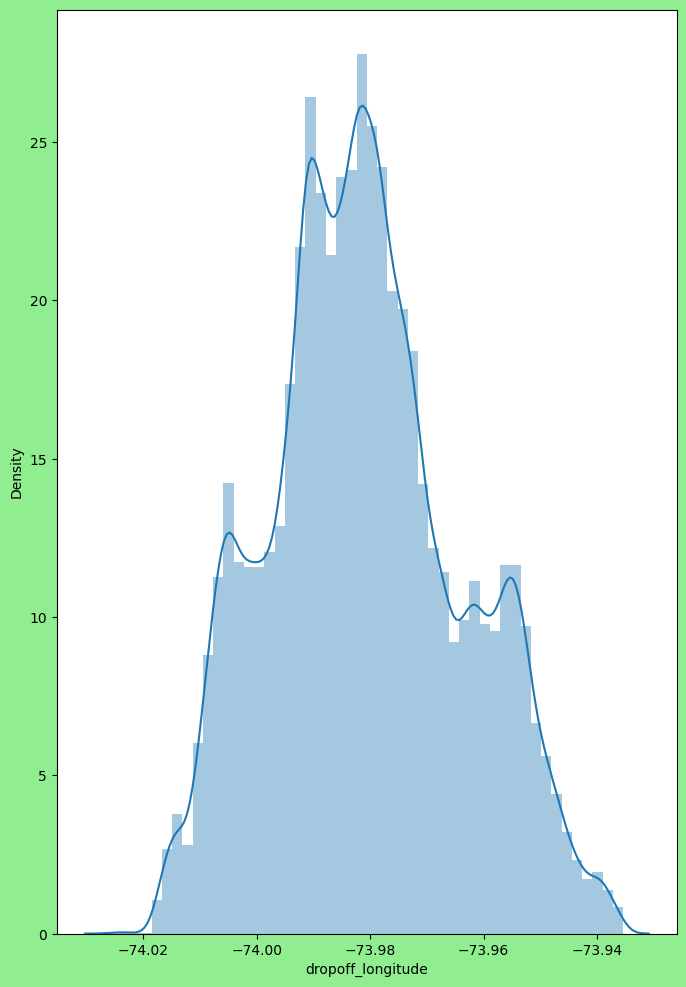

In [194]:
plt.figure(figsize = (8, 12), facecolor = "lightgreen")
sns.distplot(data1["dropoff_longitude"])

<Axes: ylabel='dropoff_longitude'>

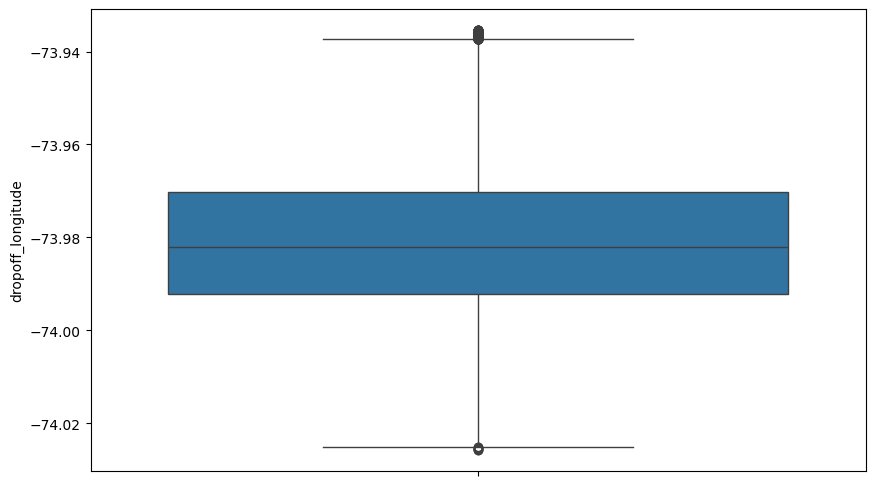

In [195]:
sns.boxplot(data1["dropoff_longitude"])

In [196]:
#Find the outlier of the dropoff_latitude column in this data frame
percentile25 = data1["dropoff_latitude"].quantile(0.25)
percentile75 = data1["dropoff_latitude"].quantile(0.75)
print(percentile25)
print(percentile75)

40.73737775
40.76722025


In [197]:
IQR = percentile75 - percentile25
print(IQR)

0.029842500000000882


In [198]:
upperlimit = percentile75 + 1.5 * IQR
lowerlimit = percentile25 - 1.5 * IQR
print("Upper Limit", upperlimit)
print("Lower Limit", lowerlimit)

Upper Limit 40.811984
Lower Limit 40.692614


In [199]:
data1[data1["dropoff_latitude"] > upperlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,time_of_day_Evening,...,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
398,19.0,-73.973711,40.759206,-73.951506,40.822800,7306.55,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
548,12.9,-73.973569,40.792419,-73.940528,40.845458,6516.31,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
728,8.9,-73.963290,40.798763,-73.939785,40.823718,3407.80,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1037,8.6,-73.974776,40.795081,-73.955565,40.821284,3330.89,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1343,6.5,-73.954185,40.806500,-73.957432,40.821095,1643.77,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198112,6.9,-73.974527,40.788177,-73.959297,40.813658,3107.86,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
198485,7.0,-73.947861,40.804375,-73.960693,40.818008,1861.35,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
198726,12.5,-73.949695,40.772808,-73.961397,40.813232,4596.44,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
198866,6.5,-73.959187,40.809550,-73.944922,40.815773,1387.87,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [200]:
data1[data1["dropoff_latitude"] < lowerlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,time_of_day_Evening,...,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
135,8.9,-74.008055,40.711553,-73.997185,40.679587,3666.73,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213,9.5,-73.995559,40.695197,-73.974702,40.687741,1947.71,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
298,15.0,-74.006209,40.714462,-73.990402,40.665240,5626.94,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
326,16.0,-73.962799,40.711994,-73.983766,40.679293,4040.72,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
329,11.7,-73.996488,40.715461,-73.962013,40.675299,5327.43,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199662,16.0,-73.988305,40.737817,-73.982477,40.686312,5740.71,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
199830,4.9,-73.990646,40.693612,-73.999476,40.688579,932.44,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
199865,14.5,-73.986748,40.722276,-73.991725,40.687732,3859.04,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
199889,10.2,-74.003892,40.722310,-73.997934,40.687450,3903.75,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [201]:
data1 = data1.drop(data1[data1["dropoff_latitude"] > upperlimit].index)
data1 = data1.drop(data1[data1["dropoff_latitude"] < lowerlimit].index)

In [202]:
data1.shape

(167382, 31)

<Axes: xlabel='dropoff_latitude', ylabel='Density'>

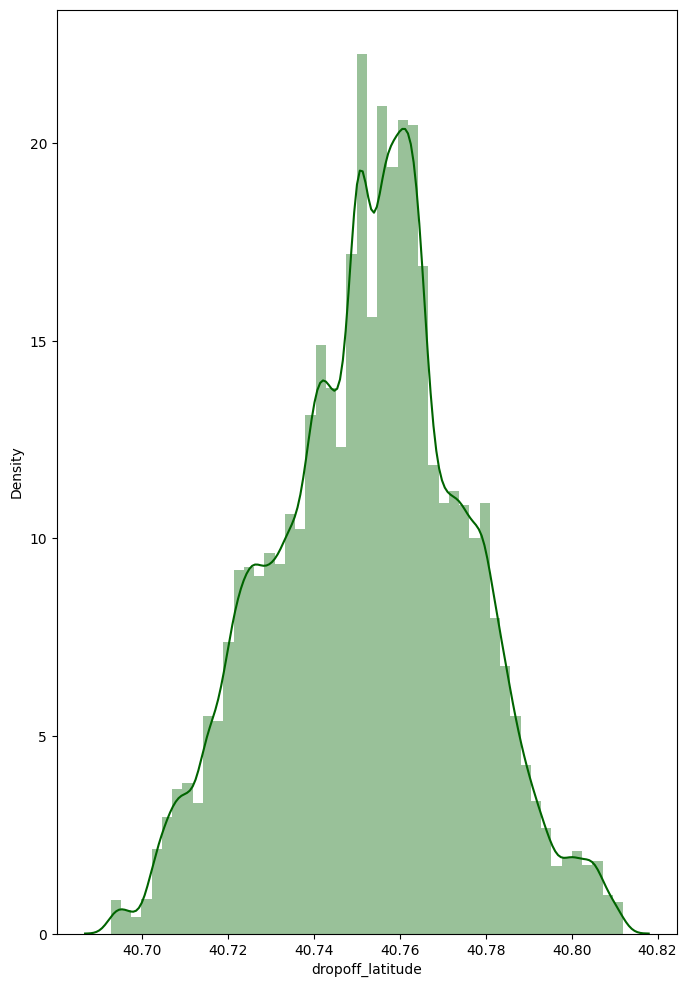

In [203]:
plt.figure(figsize = (8, 12))
sns.distplot(data1["dropoff_latitude"], color = "darkgreen")

In [204]:
data1["dropoff_latitude"].skew()

-0.07052864675964536

<Axes: ylabel='dropoff_latitude'>

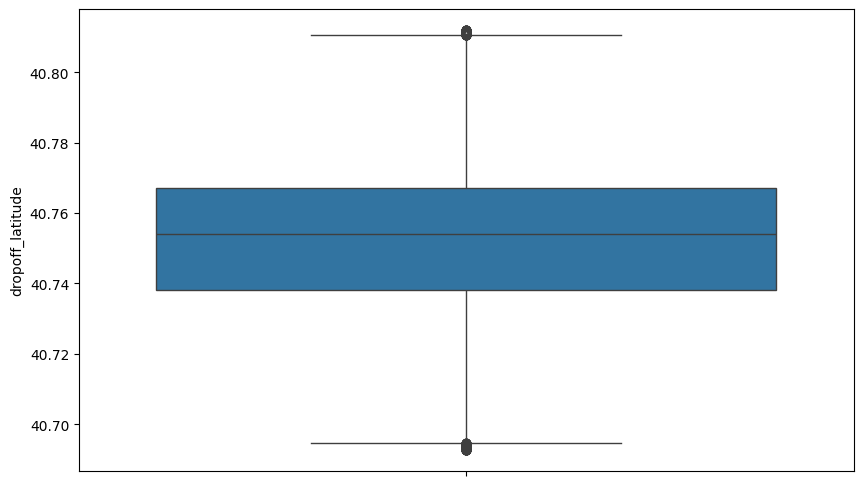

In [205]:
sns.boxplot(data1["dropoff_latitude"])

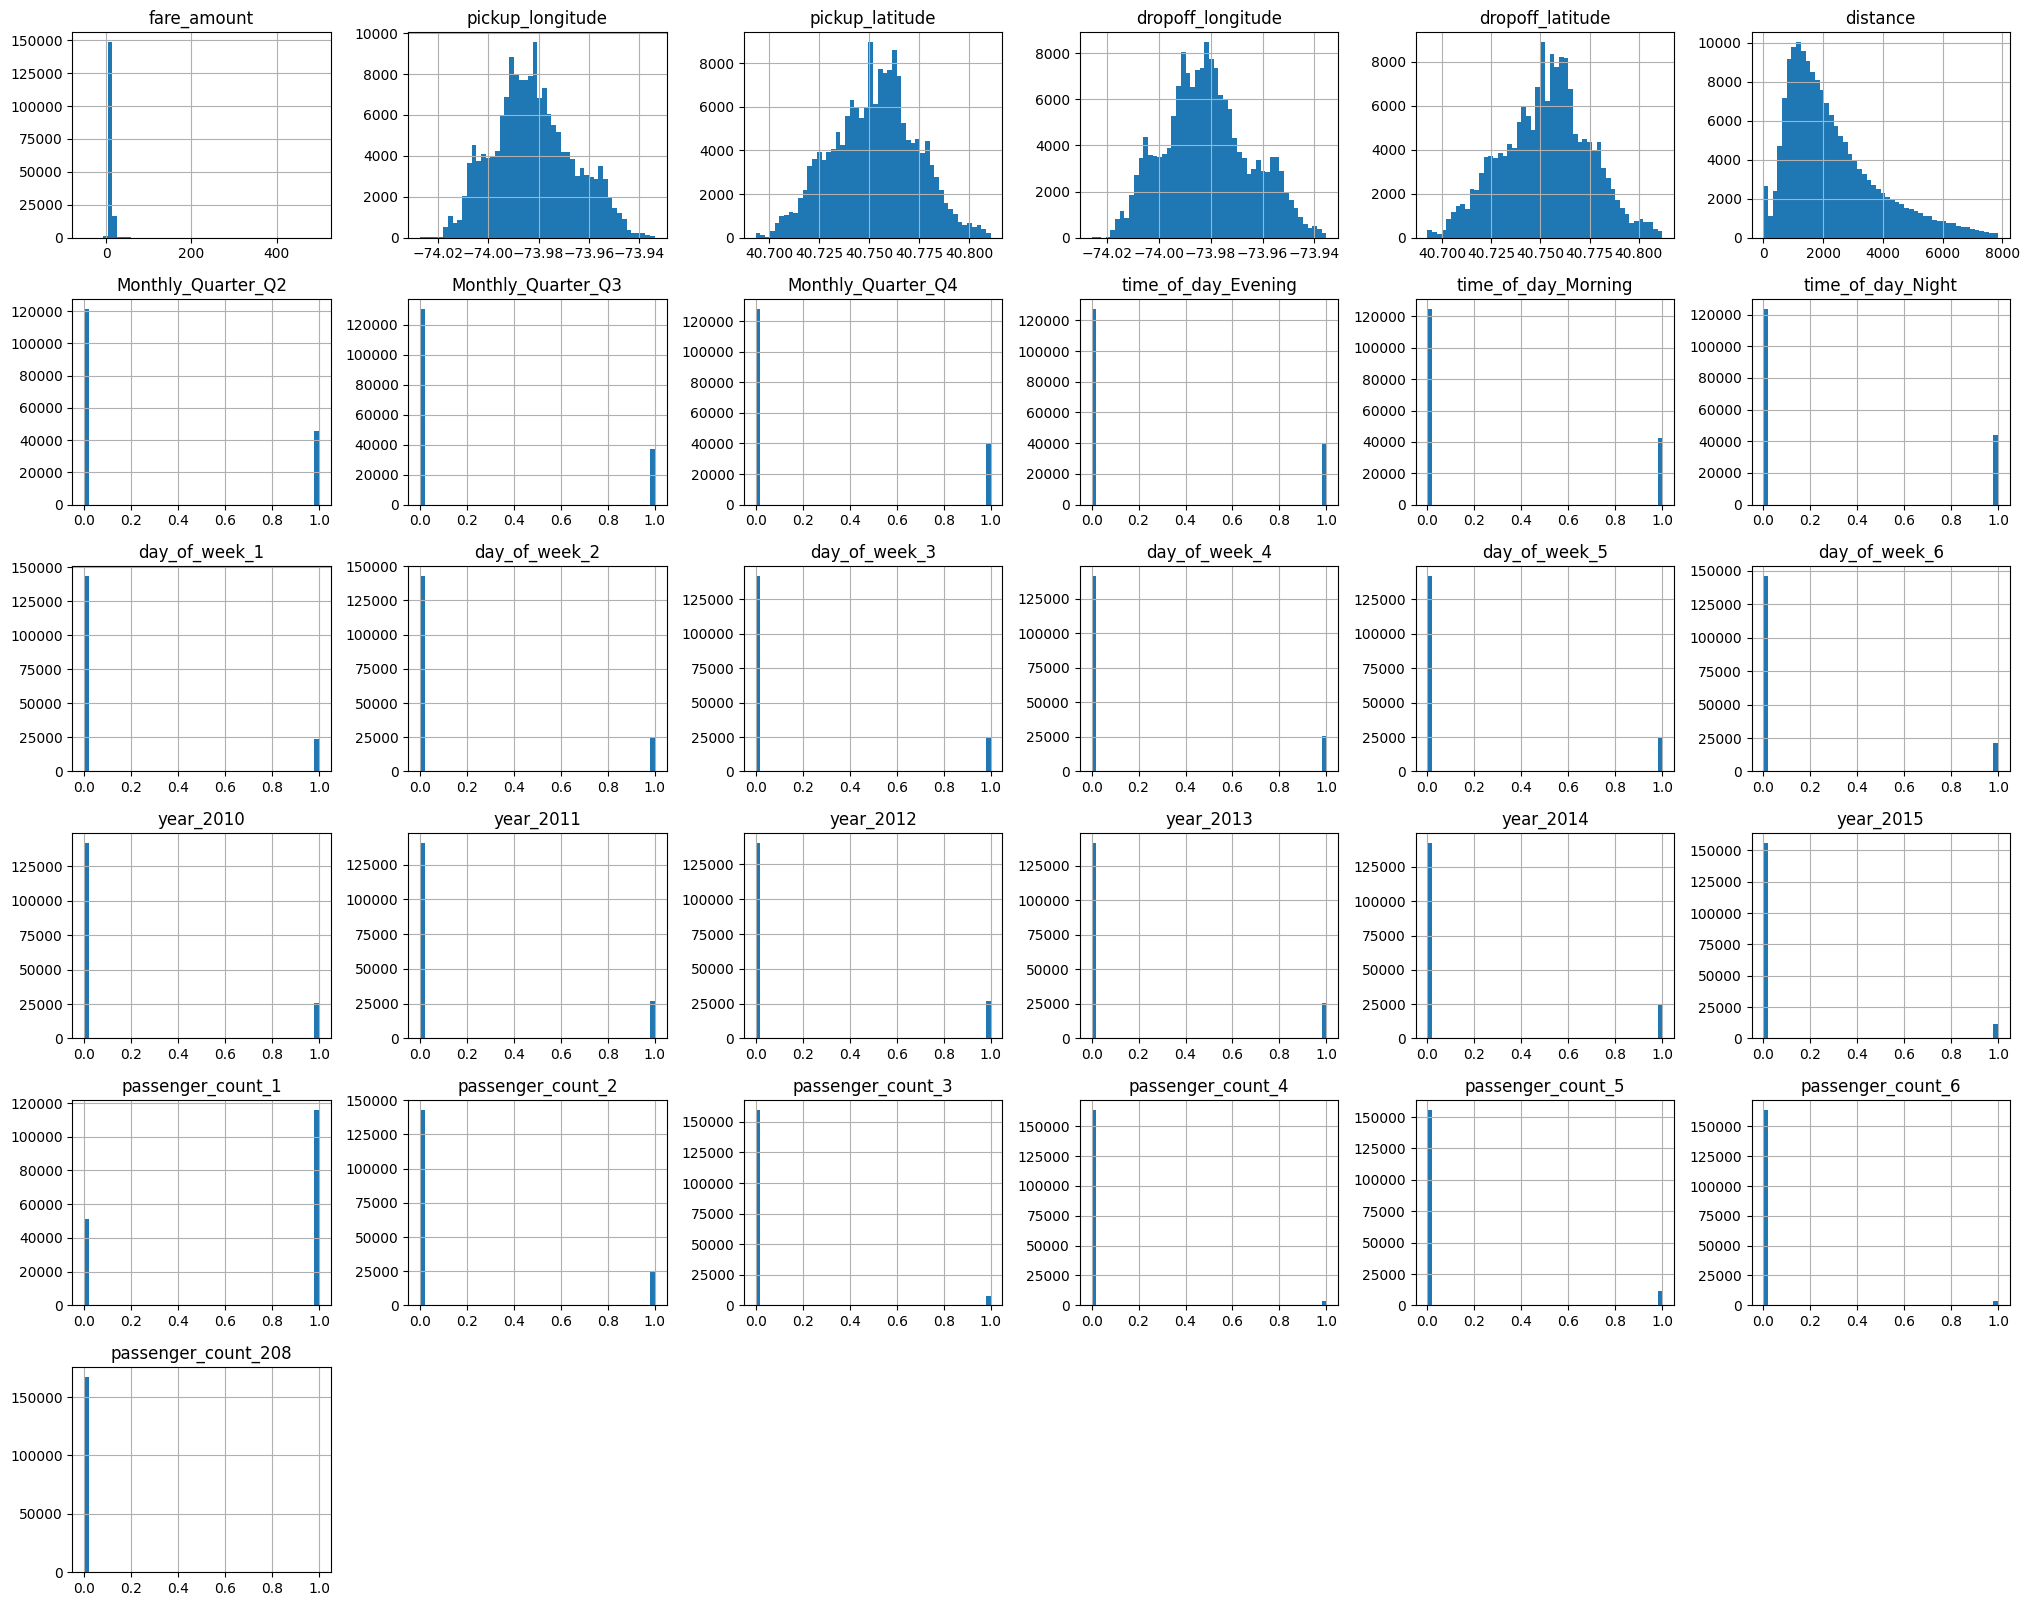

In [208]:
data1.hist(bins=50, figsize=(25, 20))
plt.show()

## Split the Dataset:


In [209]:
data1.shape

(167382, 31)

In [210]:
# Preprocess column names
m = []

for i in data1.columns.values:
    m.append(i.replace(" ","_"))

data1.columns = m

In [217]:
# separate features and target
X = data1.drop(columns=['fare_amount'])
y = data1['fare_amount']

In [218]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and 80% will be used for training
# random_state=42 ensures that the split is reproducible (i.e., results are the same each time the code is run)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the size of the training and testing sets to verify the split
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Verifying the distribution of the target variable in both training and testing sets
print("\nTraining set target distribution:")
print(y_train.describe())

print("\nTesting set target distribution:")
print(y_test.describe())


Training set size: 133905
Testing set size: 33477

Training set target distribution:
count    133905.000000
mean          8.814032
std           4.564184
min         -52.000000
25%           5.700000
50%           7.700000
75%          10.500000
max         200.000000
Name: fare_amount, dtype: float64

Testing set target distribution:
count    33477.000000
mean         8.819183
std          5.261043
min        -49.570000
25%          5.700000
50%          7.700000
75%         10.500000
max        499.000000
Name: fare_amount, dtype: float64


##  Data Scaling/Normalization:

### Standardization

In [221]:
# Standardize training and testing feature sets
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [222]:
X_train_scaler

array([[-1.40923584e+00, -6.96749101e-01,  6.09258482e-01, ...,
         3.65131761e+00, -1.47149746e-01, -2.73277090e-03],
       [ 6.75940339e-01,  3.56382966e-01,  1.04014406e+00, ...,
        -2.73873737e-01, -1.47149746e-01, -2.73277090e-03],
       [ 1.99709671e+00, -1.44885800e+00,  1.91470262e+00, ...,
        -2.73873737e-01, -1.47149746e-01, -2.73277090e-03],
       ...,
       [-4.50799630e-01,  1.03271870e+00,  1.03851827e+00, ...,
        -2.73873737e-01, -1.47149746e-01, -2.73277090e-03],
       [-1.08499720e+00, -1.43868897e+00,  5.50718839e-01, ...,
        -2.73873737e-01, -1.47149746e-01, -2.73277090e-03],
       [-3.84097925e-01, -2.14841084e-01,  1.55877343e+00, ...,
        -2.73873737e-01, -1.47149746e-01, -2.73277090e-03]])

In [223]:
X_test_scaler

array([[-0.8121891 ,  0.11636527,  1.718222  , ..., -0.27387374,
        -0.14714975, -0.00273277],
       [-0.86938878, -1.38109613, -1.26096137, ..., -0.27387374,
        -0.14714975, -0.00273277],
       [ 0.25722616, -0.49705551, -0.6240703 , ..., -0.27387374,
        -0.14714975, -0.00273277],
       ...,
       [ 0.85260296,  1.61971901,  0.53229314, ..., -0.27387374,
        -0.14714975, -0.00273277],
       [ 0.13244959,  0.43754515,  0.6851783 , ..., -0.27387374,
        -0.14714975, -0.00273277],
       [-0.3877237 , -1.17643246, -0.99330695, ..., -0.27387374,
        -0.14714975, -0.00273277]])

 Verify the Scaling/Normalization:

It’s important to check if the scaling is successful and ensures similar scales for all features.

For Standardization, the features should have a mean of 0 and a standard deviation of 1.

In [225]:
# Verify the transformed data
# Convert the scaled data back to DataFrame to check the results
scaled_train_df = pd.DataFrame(X_train_scaler, columns=X.columns)
scaled_test_df = pd.DataFrame(X_test_scaler, columns=X.columns)

# Display first few rows of scaled data
print("\nScaled Training Data (first few rows):")
print(scaled_train_df.head())

print("\nScaled Test Data (first few rows):")
print(scaled_test_df.head())



Scaled Training Data (first few rows):
   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0         -1.409236        -0.696749           0.609258          1.833233   
1          0.675940         0.356383           1.040144          0.083712   
2          1.997097        -1.448858           1.914703         -1.752392   
3         -1.187081        -0.259699          -0.935441         -0.739915   
4          1.623392         1.238285           0.167211          0.244552   

   distance  Monthly_Quarter_Q2  Monthly_Quarter_Q3  Monthly_Quarter_Q4  \
0  2.874065           -0.613853           -0.532678           -0.556495   
1 -0.944702           -0.613853           -0.532678            1.796961   
2 -0.918945           -0.613853           -0.532678           -0.556495   
3 -0.698265           -0.613853           -0.532678            1.796961   
4  0.407707           -0.613853           -0.532678           -0.556495   

   time_of_day_Evening  time_of_day_Morning  .

## Correlation Analysis:


In [228]:
# Convert the scaled data back to a DataFrame with feature names
X_train_scaled_df = pd.DataFrame(X_train_scaler, columns=X.columns)

# Add the target variable 'fare_amount' to the DataFrame
X_train_scaled_df['fare_amount'] = y_train

# Compute the Pearson correlation matrix
corr = X_train_scaled_df.corr()

# Display the correlation matrix
print(corr)


                     pickup_longitude  pickup_latitude  dropoff_longitude  \
pickup_longitude             1.000000         0.691399           0.419060   
pickup_latitude              0.691399         1.000000           0.348298   
dropoff_longitude            0.419060         0.348298           1.000000   
dropoff_latitude             0.366873         0.514909           0.646424   
distance                    -0.050661        -0.069742           0.004684   
Monthly_Quarter_Q2           0.004151         0.006657           0.005529   
Monthly_Quarter_Q3          -0.015876        -0.017521          -0.020351   
Monthly_Quarter_Q4           0.009712         0.013226           0.009811   
time_of_day_Evening          0.010587         0.018202          -0.001453   
time_of_day_Morning          0.056474         0.063288          -0.002701   
time_of_day_Night           -0.111621        -0.146135          -0.014917   
day_of_week_1                0.014092         0.019817           0.014550   

Visualize the Correlation Matrix Using a Heatmap:
A heatmap provides a clear visual representation of the correlation between variables.

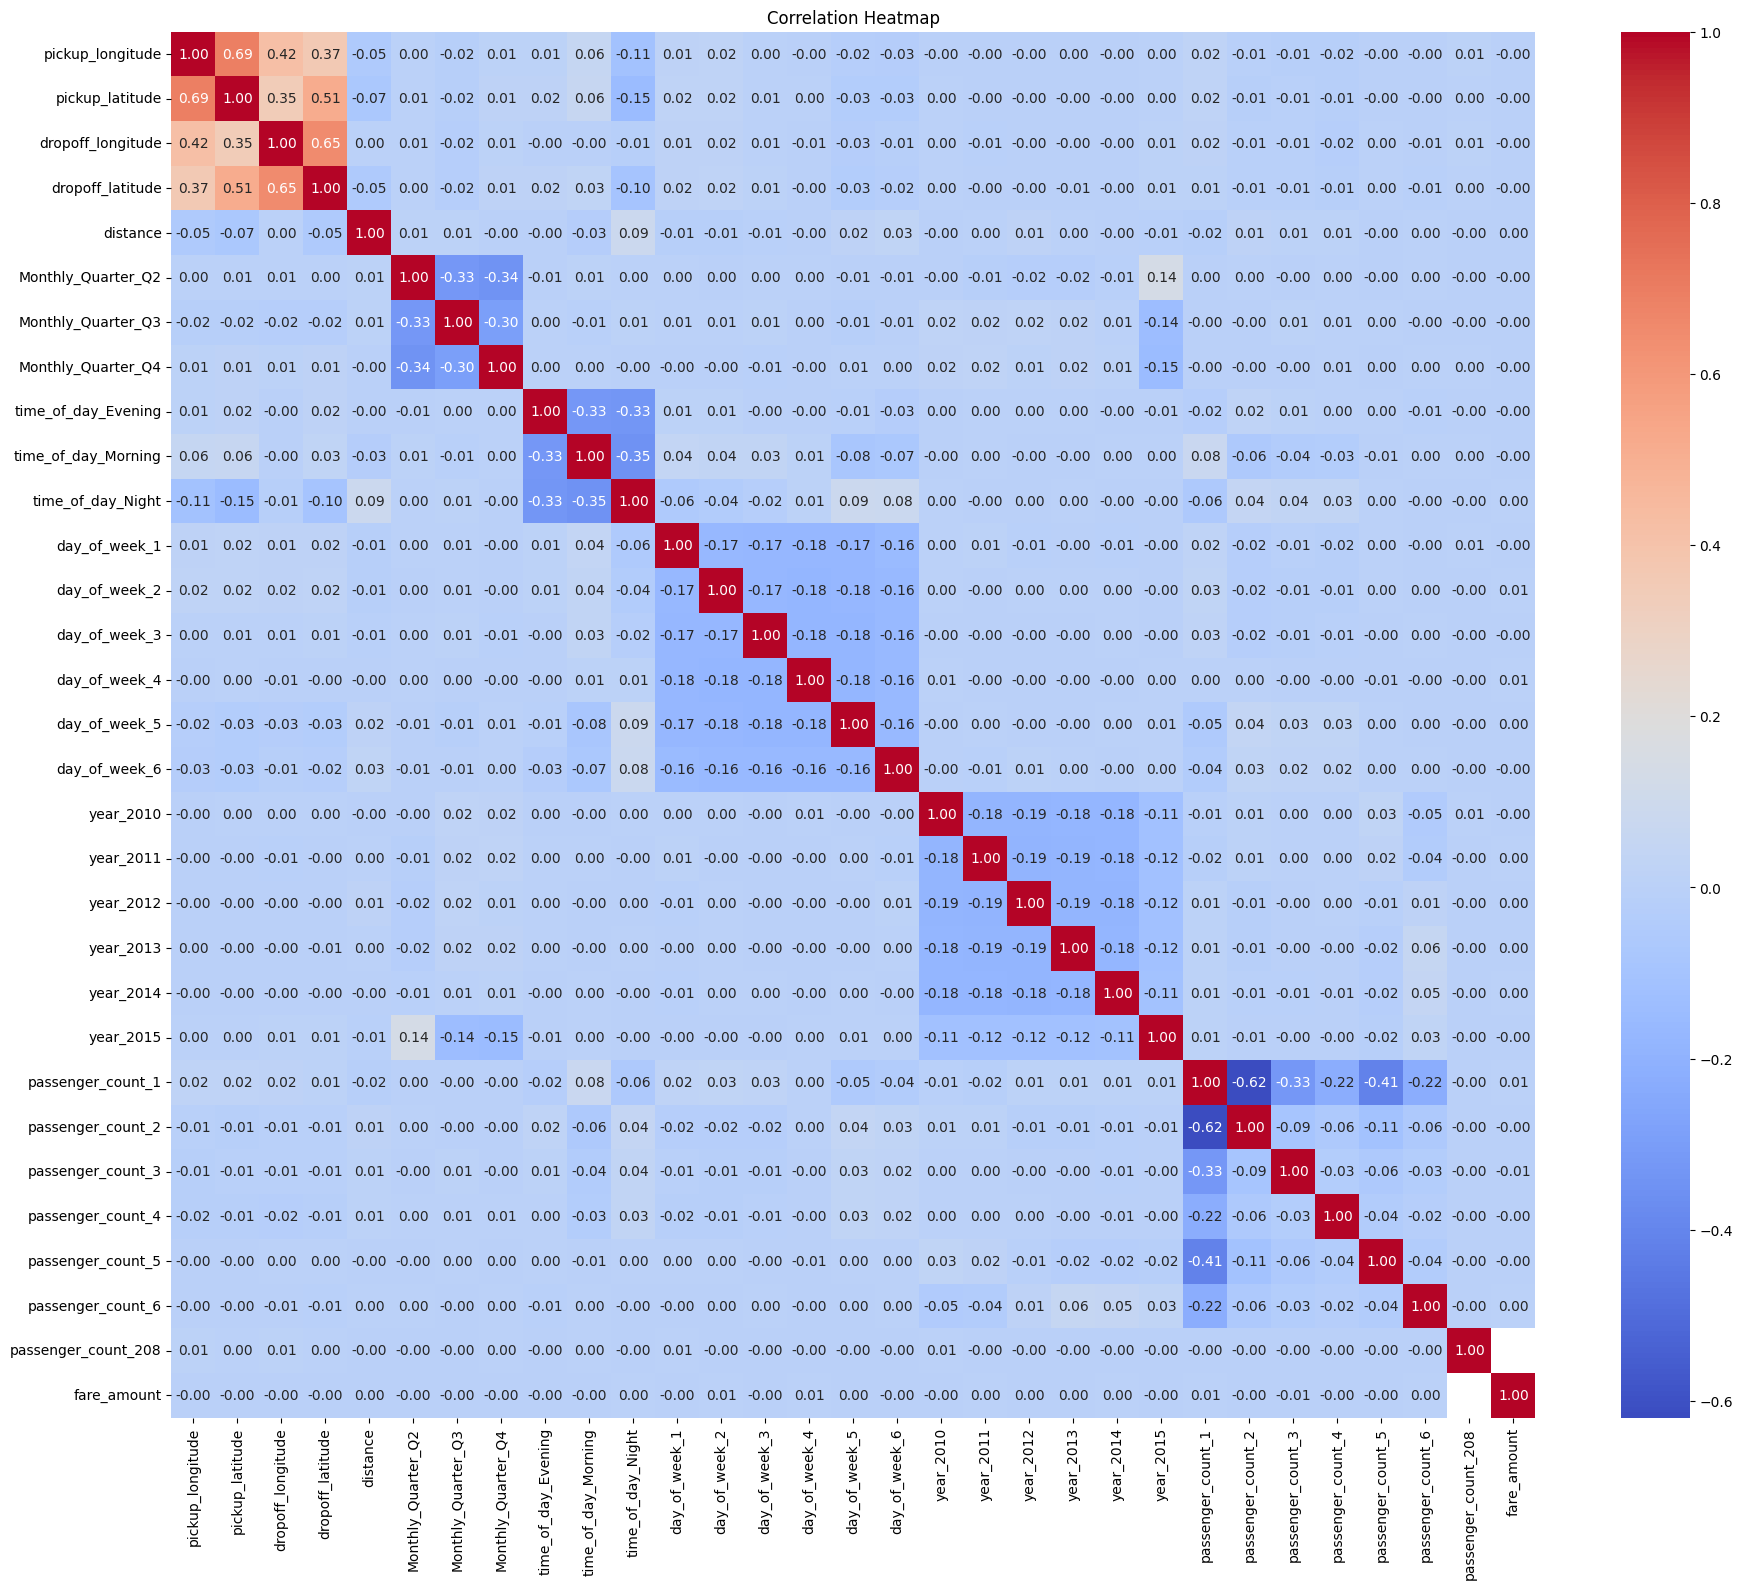

In [232]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(22, 18))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



# Component 3: Regression Modeling

## Linear Regression

In [233]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)

print(f"Linear Regression R²: {linear_r2}")
print(f"Linear Regression MSE: {linear_mse}")

Linear Regression R²: 0.384293773235855
Linear Regression MSE: 17.041358461946277


## Random Forest Regressor

In [241]:
from sklearn.datasets import make_regression
X,y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [242]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [243]:
rf = RandomForestRegressor(max_depth=11, random_state=0)

In [244]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, random_state=0)

In [245]:
print("Train Accuracy", rf.score(X_train,y_train))
print("Test Accuracy", rf.score(X_test,y_test))

Train Accuracy 0.992545908858761
Test Accuracy 0.9136927654020464


In [247]:
# Predict the fare amount for the test data
model = rf
y_pred = model.predict(X_test)
print(y_pred)

[-15.0041516   -3.45996606  38.7109568  -54.7039988  -42.40969735
  -7.08284137  35.36520479 -45.24902625 -64.2096368   43.757576
  -7.50813364 -22.91820639  -5.51657567 -17.08365401  10.31276897
  16.19499526 -10.66484028   9.3422245  -26.21263598 -17.07783576]


In [248]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 7.051534327917667
Mean Squared Error: 77.16920879872099
R-squared: 0.9136927654020464


### Fine-tuning the Model

In [249]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Set up hyperparameter grid:
For Ridge Regression

In [250]:
ridge = Ridge()

# Define hyperparameters grid for Ridge
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]  # Regularization strengths to test
}

For Lasso Regression:

In [251]:
lasso = Lasso()

# Define hyperparameters grid for Lasso
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100]  # Regularization strengths to test
}

### Perform Grid Search for Ridge and Lasso:
For Ridge

In [252]:
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

print(f"Best parameters for Ridge: {grid_search_ridge.best_params_}")
print(f"Best score for Ridge: {grid_search_ridge.best_score_}")


Best parameters for Ridge: {'alpha': 0.1}
Best score for Ridge: -0.004956882153728456


For Lasso:

In [253]:
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

print(f"Best parameters for Lasso: {grid_search_lasso.best_params_}")
print(f"Best score for Lasso: {grid_search_lasso.best_score_}")


Best parameters for Lasso: {'alpha': 0.1}
Best score for Lasso: -0.022226567107242558


### Evaluate the best model from Grid Search:
Once you have the best hyperparameters, you can evaluate the model on the test set.

For Ridge

In [254]:
# Get the predictions for Ridge
y_pred_ridge = grid_search_ridge.predict(X_test)

# Evaluate the performance of Ridge
print(f"Ridge - Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"Ridge - Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Ridge - R-squared: {r2_score(y_test, y_pred_ridge)}")


Ridge - Mean Absolute Error: 0.02890092995157064
Ridge - Mean Squared Error: 0.0012404515399931685
Ridge - R-squared: 0.9999986126598454


For Lasso:

In [255]:
# Get the predictions for Lasso
y_pred_lasso = grid_search_lasso.predict(X_test)

# Evaluate the performance of Lasso
print(f"Lasso - Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"Lasso - Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Lasso - R-squared: {r2_score(y_test, y_pred_lasso)}")


Lasso - Mean Absolute Error: 0.09059471528278679
Lasso - Mean Squared Error: 0.01233991048955364
Lasso - R-squared: 0.9999861988535826
